# Thermal Saturation in a Nonlinear Ti:Sapphire Crystal

### _Dan T. Abell, Boaz E. Nash, David L. Bruhwiler, RadiaSoft LLC_<br /> _Nicholas B. Goldring, State 33 Inc_

$\rule[2pt]{15mm}{0.33pt}\ \LaTeX\ \text{macros}\ \rule[2pt]{15mm}{0.33pt}$
$$
%% math text
\newcommand{\mhsp}{\mskip{1.5mu}}
\newcommand{\hmhsp}{\mskip{0.75mu}}
\newcommand{\nmhsp}{\mskip{-1.5mu}}
\newcommand{\nhmhsp}{\mskip{-0.75mu}}
\newcommand{\ud}{\mathop{}\!\mathrm{d}}% upright d for differential
\newcommand{\ue}{\mathrm{e}}% upright e for Euler number
\newcommand{\ui}{\mathrm{i}}% upright i for unit imaginary
\newcommand{\uj}{\mathrm{j}}% upright j for unit imaginary
\newcommand{\uk}{\mathrm{k}}% upright k for unit imaginary
\newcommand{\sl}{\,/\,}
%%
%% derivatives
\newcommand{\dd}[3][]{\ud^{#1}{#2}/\nmhsp\ud{#3}^{#1}}
\newcommand{\dt}[2][]{\ud^{#1}{#2}/\nmhsp\ud{t}^{#1}}
\newcommand{\Dd}[3][]{\frac{\ud^{#1}{#2}}{\ud{#3}^{#1}}}
\newcommand{\Dt}[2][]{\frac{\ud^{#1}{#2}}{\ud{t}^{#1}}}
\newcommand{\ptdd}[3][]{\partial^{#1}{#2}/\partial{#3}^{#1}}
\newcommand{\ptDd}[3][]{\frac{\partial^{#1}{#2}}{\partial{#3}^{#1}}}
%%
%% vector operators
\DeclareMathOperator{\grad}{\nabla\nmhsp\nmhsp}
\DeclareMathOperator{\divrg}{{\nabla\cdot}\nmhsp\nhmhsp}
\DeclareMathOperator{\curl}{{\nabla\times}\nmhsp\nhmhsp}
%%
%% vectors
%% -- using \boldsymbol
% \newcommand{\uV}[1]{\hat{\boldsymbol{#1}}}% unit vector
% \newcommand{\V}[1]{\boldsymbol{#1}}% vector
% \newcommand{\uVg}[1]{\hat{\boldsymbol{#1}}}% unit vector
% \newcommand{\Vg}[1]{\boldsymbol{#1}}% vector
%% -- using \vec
\newcommand{\uV}[1]{\hat{{#1}}}% unit vector
\newcommand{\V}[1]{\vec{#1}}% vector
\newcommand{\uVg}[1]{\hat{{#1}}}% unit vector
\newcommand{\Vg}[1]{\vec{#1}}% vector
$$
$\rule[2pt]{58.3mm}{0.33pt}$

---
## Introduction & Theory

In this notebook, we solve the three-dimensional heat (diffusion) equation in a cylindrical
Ti:sapphire crystal, with a Dirichlet boundary condition $u_D$ on the cylindrical surface, Neumann
boundary conditions on the end caps, and a source term—_e.g._ heat deposited by a pump laser—that
decays exponentially along the axis from one end cap towards the other. For the problem at hand,
both the thermal conductivity $\kappa$ and the specific heat capacity $c_p$ depend on temperature.
In this case, the heat equation becomes nonlinear and takes the form
[[Rincon _et al._ (2006)]](#ref:Rincon-2006-NonlinearHeat)
$$
\begin{equation}
  \ptDd{u}{t} = \divrg{\left( \frac{\kappa(T)}{\rho c_p(T)}\grad{u} \right)} + g(\V{r}, t).
\end{equation}
$$
Here $u$ denotes the crystal's internal energy density per unit mass, $\rho$ the mass density of
the crystal, and $g$ a (possibly time-dependent) source term that represents energy deposition
within the crystal.
If we wish to include the temperature dependence of the mass density $\rho$, then we must modify
the above equation to read
$$
\begin{equation}
  \ptDd{u}{t} = \divrg{\left( \frac{\kappa(T)}{\rho(T) c_p(T)}\grad{u} \right)}
                + \frac{\kappa(T)}{[\rho(T) c_p(T)]^2} \ptDd{\rho}{T} |\grad{u}|^2
                + g(\V{r}, t).
\end{equation}
$$
We shall need to rewrite the above equations entirely in terms of $u$. One may do so by making
use of the fact that the specific heat capacity is defined as
$$
\begin{equation}
  c_p(T) = \ptDd{u}{T} \bigg\vert_P,
\end{equation}
$$
whence one may determine $u(T)$ as the area under the specific heat curve up to the given
temperature. On inverting that relation, we obtain $T(u)$, and hence the general heat equation
becomes
$$
\begin{equation}
  \ptDd{u}{t} = \divrg{\left( \frac{\kappa(u)}{\rho(u) c_p(u)}\grad{u} \right)}
                + \frac{\kappa(u)}{[\rho(u) c_p(u)]^2} \ptDd{\rho}{T}(T(u)) |\grad{u}|^2
                + g(\V{r}, t).
\end{equation}
$$
For now we assume negligible thermal expansion, hence $\ptdd{\rho}{T} = 0$,
and we write $\alpha(u)$ for $\kappa(u)/[\rho(u) c_p(u)]$.
In other words, we now focus on the nonlinear heat equation in the form
$$
\begin{equation}
  \ptDd{u}{t} = \divrg{\left( \alpha(u)\grad{u} \right)} + g(\V{r}, t).
\end{equation}
$$


&emsp;&emsp;
As for the boundary conditions, we set the initial energy density to the value $u_0 = u(T_0)$,
where $T_0$ denotes the initial temperature (assumed uniform) of the system.
In addition, we assume a Dirichlet boundary condition of $u = u_0$ on the transverse
(cylindrical) surface of the crystal, and Neumann boundary conditions $\ptdd{u}{n} = 0$ on
the end caps. To summarize:
$$
\begin{align}
  u           &= u_0  \quad\text{at initial time $t = 0$}, \\
  u           &= u_0  \quad\text{on the cylindrical surface}, \\
  \ptDd{u}{n} &= 0    \hphantom{u}\quad\text{on the end caps}.
\end{align}
$$
Finally, we assume a time-independent heat source $g$ having a Gaussian profile transversely,
and an exponential decay from the entrance face along the cylindrical axis of the crystal:
$$
\begin{equation}
  g(\V{r}, t) = g_0 \exp\left(-\frac{r^2}{\sigma^2}\right)
                    \exp\left(-\frac{z - z_0}{\zeta}\right),
\end{equation}
$$
where $g_0$ denotes the power absorbed per unit mass,
and $V_\text{eff}$ denotes the effective volume absorbing that power:
$$
\begin{align}
  g_0          &= \frac{P_\text{abs}}{\rho V_\text{eff}}, \\
  V_\text{eff} &= \int_\text{crystal} \exp\left(-\frac{r^2}{2\sigma^2}\right)
                    \exp\left(-\frac{z - z_0}{\zeta}\right) \ud^3\V{r}
                = \pi \sigma^2 \zeta (1 - \ue^{-l/\zeta}).
\end{align}
$$

Our initial simulations assume that $\rho$ does not vary with temperature.
We may later relax that assumption.

&emsp;&emsp;
This notebook is organized as follows: The preamble imports required modules and defines
a variety of needed functions. We then define some of the thermal properties of sapphire.
In particular we construct an interpolating function that returns the thermal diffusivity
$\alpha$ of sapphire as a function of the internal energy density. With that function in
hand, we then go on to use FEniCS to simulate thermal saturation in a sapphire crystal
having a temperature-dependent thermal diffusivity. This system, governed by the nonlinear
heat equation, is compared to the same system with $\alpha = \text{constant}$.

### References

<a id='references'></a>

Herewith a collection of references. Most concern ...

1. S. Cho, J. Jeong, S. Hwang, and T.J. Yu, “Thermal lens effect model of Ti:sapphire for use in high-power laser amplifiers”, _Applied Physics Express_, 11(9):092701, Aug. 2018. [doi: 10.7567/apex.11.092701](https://doi.org/10.7567/apex.11.092701).
<a id='ref:Cho-2018-ThermLensModel'></a>
2. D.A. Ditmars, S. Ishihara, S.S. Chang, G. Bernstein, and E.D. West, “Enthalpy and heat-capacity standard reference material: Synthetic sapphire (α-Al<sub>4</sub>O<sub>3</sub>) from 10 to 2250 K”, _J. Res. Natl. Bur. Stand._, 87(2):159–163, Mar. 1982. [doi: 10.6028/jres.087.012](https://doi.org/10.6028/jres.087.012).
<a id='ref:Ditmars-1982-StdRefSynthSapphire'></a>
3. M.E. Innocenzi, H.T. Yura, C.L. Fincher, and R.A. Fields, “Thermal modeling of continuous-wave end-pumped solid-state lasers”, _Appl. Phys. Lett._, 56(19):1831–1833, May 1990. [doi: 10.1063/1.103083](https://doi.org/10.1063/1.103083).
<a id='ref:Innocenzi-1990-ThermModLaser'></a>
4. J.D. Jackson, _Classical Electrodynamics_, John Wiley & Sons, New York, NY, third edition, 1999.
<a id='ref:Jackson-1999-CED'></a>
5. M.A. Rincon, J. Límaco, and I.-S. Liu, “A nonlinear heat equation with temperature-dependent parameters”, _Math. Phys. Electron. J._, 12:5, 2006.
<a id='ref:Rincon-2006-NonlinearHeat'></a>
6. R. Sabbah, A. Xu-Wu, J.S. Chickos, M.L.P. Leitão, M.V. Roux, and L.A. Torres, “Reference materials for calorimetry and differential thermal analysis”, _Thermochim. Acta_, 331(2):93–204, June 1999. [doi: 10.1016/S0040-6031(99)00009-X](https://doi.org/10.1016/S0040-6031(99)00009-X).
<a id='ref:Sabbah-1999-RefMaterials'></a>
7. J. Tapping and M.L. Reilly, “Index of refraction of sapphire between 24 and 1060°C for wavelengths of 633 and 799 nm”, _J. Opt. Soc. Amer. A_, 3(5):610–616, May 1986. [doi: 10.1364/JOSAA.3.000610](https://doi.org/10.1364/JOSAA.3.000610).
<a id='ref:Tapping-1986-IdxRefrSapphire'></a>

---
## Preamble

Relation of the Greek alphabet to the Latin keys (on Mac OS):

```
a b g  d e  z h u  i k l  m n j  o p  r s  t y f  x c v  w
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
α β γ  δ ε  ζ η θ  ι κ λ  μ ν ξ  ο π  ρ σ  τ υ φ  χ ψ ω  ς
    Γ  Δ               Λ      Ξ    Π    Σ    Υ Φ    Ψ Ω
```

### Required imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects
# import seaborn as sb
# import pandas as pd
# import math as m
import numpy as np
from scipy import interpolate as scinterp
from scipy import integrate as scinteg
from scipy import optimize as sciopt
from scipy import special as scisf
import time as tm
import copy
import os
# import re
import pickle

In [2]:
from fenics import *
from mshr import *   # now deprecated (?), transition to alternate mesh generator (?)

In [3]:
# plt.style.available
# plt.style.use('Solarize_Light2')
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 15

### Notebook directory

Where are we?

In [4]:
nb_dir = os.getcwd() + '/'
nb_dir

'/home/vagrant/jupyter/rslaser/examples/thermal/'

### Mathematical and physical constants

Define some mathematical constants:

In [5]:
# pi
π = np.pi

# golden ratio
gr = (1 + np.sqrt(5)) / 2

# roots
rt2 = np.sqrt(2.)

# degree to radian, and radian to degree
degree = π / 180.
d2r = degree
r2d = 1 / degree

Define the SI prefixes, which are particularly useful in converting data for plots:

In [6]:
# SI prefixes
si_Y  = 1.e24  # yotta
si_Z  = 1.e21  # zetta
si_E  = 1.e18  # exa
si_P  = 1.e15  # peta
si_T  = 1.e12  # tera
si_G  = 1.e9   # giga
si_M  = 1.e6   # mega
si_k  = 1.e3   # kilo
si_h  = 1.e2   # hecto
si_da = 1.e1   # deka
si_d  = 1.e-1  # deci
si_c  = 1.e-2  # centi
si_m  = 1.e-3  # milli
si_u  = 1.e-6  # micro
si_n  = 1.e-9  # nano
si_p  = 1.e-12 # pico
si_f  = 1.e-15 # femto
si_a  = 1.e-18 # atto
si_z  = 1.e-21 # zepto
si_y  = 1.e-24 # yocto

And some physical constants:

In [7]:
# Recommended Values for the Physical Constants have been published by
# CODATA for the years 2018 2014 2010 2006 2002 1998 1986 1973 1969
# scipy.constants uses 2018

import scipy.constants as sc
# [ key for key in sc.physical_constants.keys() if "Boltzmann" in key ]

clight  = sc.physical_constants["speed of light in vacuum"][0]
k_B = sc.physical_constants["Boltzmann constant"][0]
# m_e_MeV = sc.physical_constants["electron mass energy equivalent in MeV"][0]
# m_p_MeV = sc.physical_constants["proton mass energy equivalent in MeV"][0]

# phoot (light-nano-second / m)
phoot = clight * si_n

# m_e_eV  = m_e_MeV * si_M
# m_e_GeV = m_e_MeV / si_k
# m_p_eV  = m_p_MeV * si_M
# m_p_GeV = m_p_MeV / si_k

### Function definitions (utilities)

Function to list directory contents:

In [8]:
def ls(path = None):
    """
    List directory contents, exluding dot-files and vim backups.
    """
    return [ f for f in np.sort(os.listdir(path)) if not (f[0] == '.' or f[-1] == '~') ]

NB: Can probably use `np.loadtxt()` instead of the following two functions.

Function to read text data from a file:

In [9]:
def read_txt_file(txt_fname):
    # open file and read contents
    with open(txt_fname, 'r') as fh:
        data = [ line.strip().split() for line in fh ]
    return data

Function to read numerical CSV data from a file:

In [10]:
def read_csv_numdata(fname, nhead = 0):
    """
    Read numerical CSV data from a given file.
    Return data as a numpy array.

    Argument:
      fname -- name of CSV file to read
      nhead -- number of header lines to ignore
    """
    # open file and read contents
    fh = open(fname, 'r')
    table = [ [ float(w.strip(',')) for w in line.strip().split() ] for line in fh ]

    return np.asarray(table[nhead:])

Function to grab both min and max of a list:

In [11]:
def minmax(it):
    min = max = None
    for val in it:
        if min is None or val < min:
            min = val
        if max is None or val > max:
            max = val
    return min, max

Function to print a matrix in an easy-to-read form:

In [12]:
def print_matrix(M, fmt = '13.9f'):
    """
    Print matrix M row by row.
    """
    r, c = np.shape(M)
    fmtstr = '{0:' + fmt + '}' 
    for j in range(r):
        #print('', end = '  ')
        for k in range(c - 1):
            print(fmtstr.format(M[j, k]), end = '  ')
        print(fmtstr.format(M[j, c - 1]))

Averaging routines for circle and cylindrical shell:

In [13]:
# trapezoidal weights
def trap_weights(n):
    wts = np.ones(n)
    wts[0] = 0.5
    wts[-1] = 0.5
    return(wts)

# trapezoidal integration (quadrature)
def trap_quad(f, a, b, n):
    tol = 1.e-13
    if abs(b - a) < tol: return 0.
    h = (b - a) / (n - 1)
    zv = np.linspace(a, b, n)
    fv = [ f(z) for z in zv ]
    return h * (0.5 * (fv[0] + fv[-1]) + sum(fv[1:n-1]))

# compute average of u(r,z) on a circle of radius r at longitudinal position z
# using a given number of points (num_thetas) spaced evenly about the circle
# NB: do NOT bother doing something fancy here --- b/c u is periodic on the
# circle, a Riemann sum converges exponentially fast as num_thetas increases
def average_on_circle(u, r, z, num_thetas):
    thetas = np.linspace(0., 2.*π, num_thetas, endpoint = False) 
    circle_points = [(r * cos(th_), r * sin(th_), z) for th_ in thetas]
    return(np.mean([u(pt) for pt in circle_points]))

# compute average of u(r,z) over the surface of a cylinder of radius r
# between longitudinal positions z0 znd z1
def average_on_cylinder(u, r, z0, z1, num_zs, num_thetas):
    zs = np.linspace(z0, z1, num_zs)
    t_circ = [average_on_circle(u, r, z_, num_thetas) for z_ in zs]
    return(np.average(t_circ, weights = trap_weights(num_zs)))

Functions to place lines on a plot:

In [14]:
def hline(yl, x01, clr, wd = 1):
    plt.plot(x01, [yl, yl], clr, lw = wd)

def vline(xl, y01, clr, wd = 1):
    plt.plot([xl, xl], y01, clr, lw = wd)

### Function definitions (thermal)

Thermal time constant

In [15]:
def tau(α, a, nmax):
    nu0_n = scisf.jn_zeros(0, nmax)
    return (a ** 2 / α) / (nu0_n ** 2)

In [16]:
def ufb(u0, α, a, eps, nmax, r, t):
    nu0_n = scisf.jn_zeros(0, nmax)
    arg_coeff   = nu0_n * (eps / a)
    num_coeff   = (arg_coeff) * scisf.j1(arg_coeff)
    denom_coeff = (nu0_n * scisf.j1(nu0_n)) ** 2
    tau_n       = (a ** 2 / α) / (nu0_n **2)
    coeff       = (2 * u0) * (num_coeff / denom_coeff) * np.exp(-t / tau_n)
    u_vals      = np.dot(coeff, scisf.j0(nu0_n * (r / a)))
    return u_vals

In [17]:
def ueq(f0, α, a, eps, nmax, r):
    nu0_n = scisf.jn_zeros(0, nmax)
    arg_coeff   = nu0_n * (eps / a)
    num_coeff   = (arg_coeff) * scisf.j1(arg_coeff)
    denom_coeff = (nu0_n * scisf.j1(nu0_n)) ** 2
    coeff       = (2 * f0) * (num_coeff / denom_coeff)
    coeff_eq    = (a ** 2 / α) / (nu0_n ** 2) * coeff
    u_val       = np.dot(coeff_eq, scisf.j0(nu0_n * (r / a)))
    return u_val

---
## Physical, Thermal, and Optical Properties of Sapphire and/or Ti:Sapphire

### Mass density and atomic weight

I have seen the mass density of sapphire, $\text{Al}_2\text{O}_3$, quoted most frequently
as $3.98\,\mathrm{gm \,/\, cm^3}$, though I have also seen $3.97$ and $3.96$.

In [18]:
# mass density / (gm / cm^3)
mass_density_Al2O3 = 3.98
ρ_Al2O3 = mass_density_Al2O3

In [19]:
# (weighted) relative atomic mass / (gm / mol)
# 2 * A_Al + 3 * A_O = 2 * 26.98154 + 3 * 15.9994
atomicwt_Al2O3 = 101.96128

### Specific heat capacity*

Temperature-dependent specific heat of sapphire:
See [Ditmars, _et al._ (1982)](#ref:Ditmars-1982-StdRefSynthSapphire)
and [Sabbah, _et al._ (1999)](#ref:Sabbah-1999-RefMaterials).
These two references report the specific values in units of J/mol/K; in other
words, they report the _molar_ specific heat. Because we want the _mass_ specific
heat, we must divide by the atomic weight of sapphire.

NB: I have added to both these datasets a point at (0,0), as the specific heat capacity
necessarily vanishes at absolute zero.

In [20]:
# Ditmars, et al. (1982)
# -- temperature / K
K82 = np.asarray([     0,
     10,       15,       20,       25,       30,       35,       40,       45,       50,       60,
     70,       80,       90,      100,      110,      120,      130,      140,      150,      160,
    170,      180,      190,      200,      210,      220,      230,      240,      250,      260,
    270,      273.15,   280,      290,      298.15,          
    300,      310,      320,      330,      340,      350,      360,      370,      380,      390,
    400,      410,      420,      430,      440,      450,      460,      470,      480,      490,
    500,      510,      520,      530,      540,      550,      560,      570,      580,      590,
    600,      610,      620,      630,      640,      650,      660,      670,      680,      690,
    700,      720,      740,      760,      780,      800,      820,      840,      860,      880,
    900,      920,      940,      960,      980,     1000,     1020,     1040,     1060,     1080,
   1100,     1120,     1140,     1160,     1180,     1200,     1250,     1300,     1350,     1400,     1450,
   1500,     1550,     1600,     1650,     1700,     1750,     1800,     1850,     1900,     1950,
   2000,     2050,     2100,     2150,     2200,     2250 ])
# -- molar specific heat / (J / mol / K)
Cp82 = np.asarray([     0.,
   0.0091,   0.0307,   0.0732,   0.146,    0.265,    0.443,    0.697,    1.046,    1.506,    2.793,
   4.592,    6.901,    9.678,   12.855,   16.347,   20.07,    23.95,    27.93,    31.95,    35.95,
  39.90,    43.75,    47.50,    51.12,    54.61,    57.95,    61.14,    64.10,    67.00,    69.82,
  72.42,    73.21,    74.87,    77.20,    79.01,
  79.41,    81.51,    83.49,    85.37,    87.16,    88.84,    90.45,    91.97,    93.41,    94.78,
  96.00,    97.32,    98.50,    99.62,   100.69,   101.71,   102.68,   103.60,   104.48,   105.33,
 106.13,   106.90,   107.64,   108.35,   109.02,   109.67,   110.29,   110.89,   111.46,   112.02,
 112.55,   113.06,   113.55,   114.02,   114.48,   114.92,   115.35,   115.76,   116.16,   116.55,
 116.92,   117.64,   118.32,   118.96,   119.56,   120.14,   120.69,   121.21,   121.71,   122.20,
 122.66,   123.11,   123.55,   123.97,   124.37,   124.77,   125.16,   125.53,   125.90,   126.26,
 126.61,   126.95,   127.29,   127.61,   127.94,   128.25,   129.01,   129.74,   130.43,   131.08,   131.70,
 132.29,   132.84,   133.36,   133.85,   134.31,   134.73,   135.13,   135.50,   135.83,   136.18,
 136.50,   136.80,   137.10,   137.41,   137.73,   138.06 ])

# Sabbah, et al. (1999)
# (point at 1600 K appears out of line w/rt the neighboring data)
# -- temperature / K
K99 = np.asarray([   0,
     10,       25,       50,       75,      100,      150,      200,      250,      298.15,
    300,      350,      400,      450,      500,      550,      600,      650,      700,
    800,      900,     1000,     1100,     1200,     1250,     1300,     1350,     1400,
   1450,     1500,     1550,     1600,     1650,     1700,     1750,     1800,     1850,
   1900,     1950,     2000,     2050,     2100,     2150,     2200,     2250 ])
# -- molar specific heat / (J / mol / K)
Cp99 = np.asarray([     0.,
   0.0091,   0.146,    1.507,    5.685,   12.855,   31.95,    51.12,    67.08,    79.01,
  79.41,    88.84,    96.08,   101.71,   106.13,   109.67,   112.55,   114.92,   116.92,
 120.14,   122.66,   124.77,   126.61,   128.25,   129.01,   129.74,   130.43,   131.08,
 131.70,   132.29,   132.84,   133.86,   133.85,   134.31,   134.73,   135.13,   135.50,
 135.85,   136.18,   136.50,   136.80,   137.10,   137.41,   137.73,   138.06 ])

# mass specific heat / (J / gm / K)
Cp82m = Cp82 / atomicwt_Al2O3
Cp99m = Cp99 / atomicwt_Al2O3

In [21]:
label_T     = r'$T   \,/\, \mathrm{K}$'
label_molCp = r'$c_p \,/\, \mathrm{ J \,/\, mol \,/\, K}$'
label_Cp    = r'$c_p \,/\, \mathrm{ J \,/\, gm  \,/\, K}$'
label_U     = r'$u   \,/\, \mathrm{ J \,/\, gm}$'
label_kU    = r'$u   \,/\, \mathrm{kJ \,/\, gm}$'

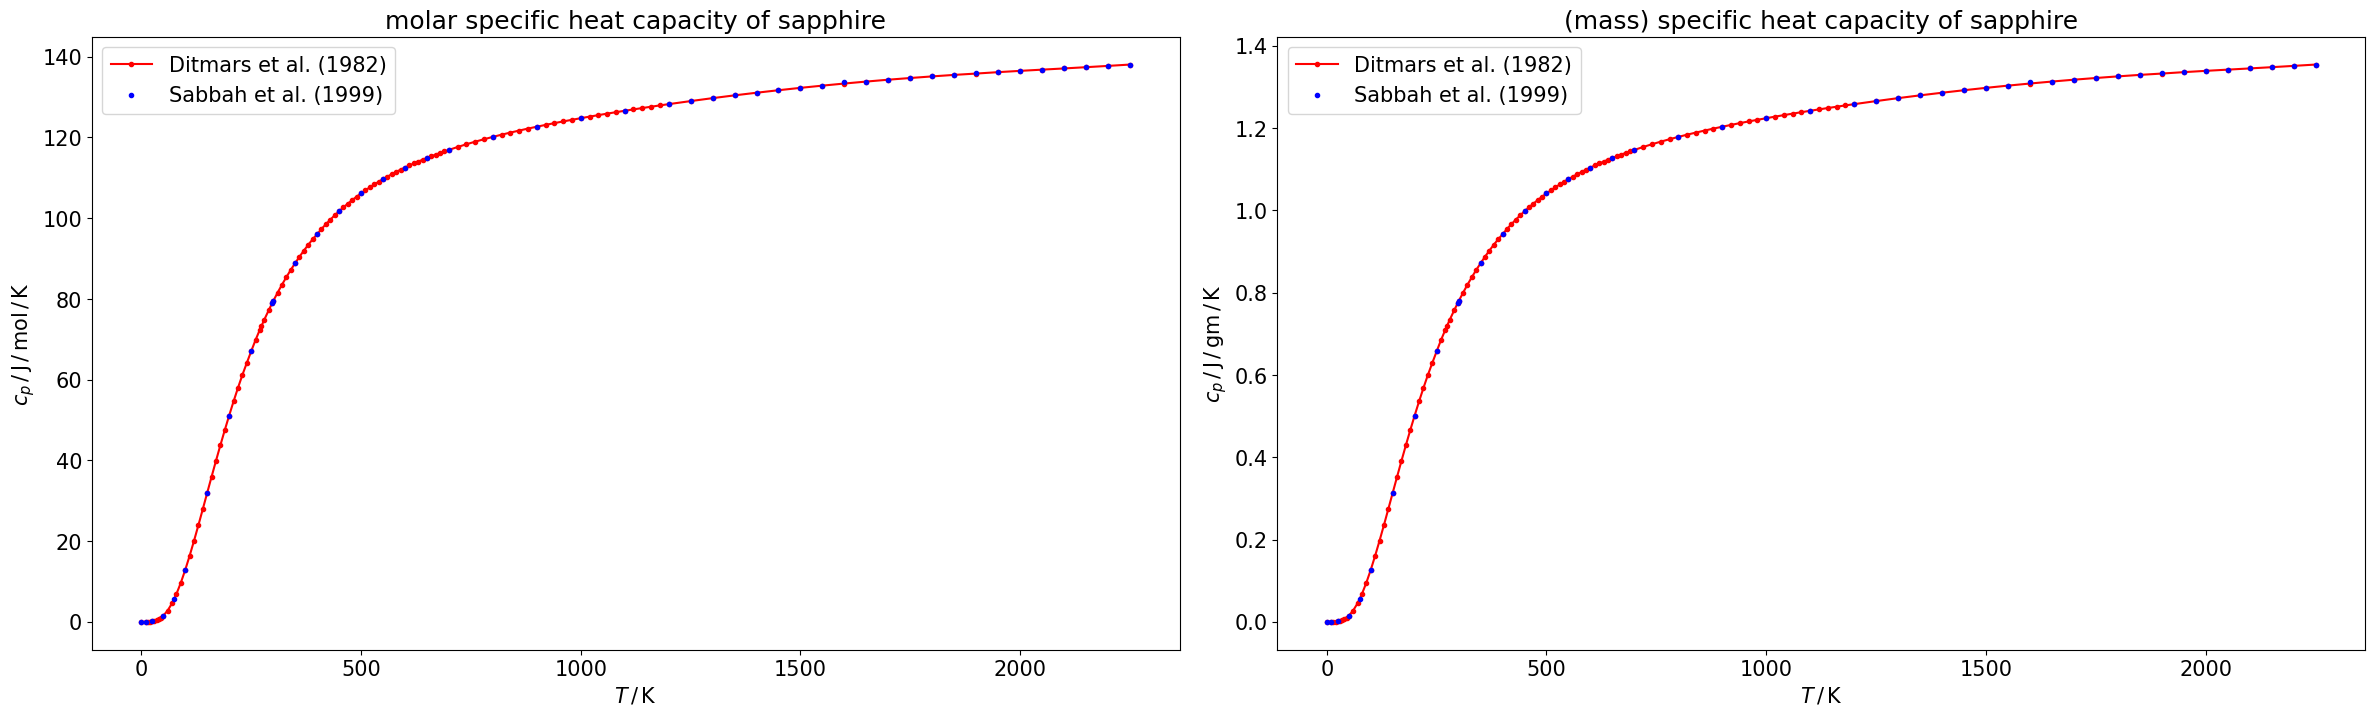

In [22]:
idx = 0
n_rows = 1
n_cols = 2
sz_h = 12
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.plot(K82, Cp82, 'r.-', label = r'Ditmars et al. (1982)')
ax.plot(K99, Cp99, 'b.',  label = r'Sabbah et al. (1999)')
# plt.xlim(0,350)
# plt.ylim(0,100)
plt.title('molar specific heat capacity of sapphire')
plt.xlabel(label_T)
plt.ylabel(label_molCp)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.plot(K82, Cp82m, 'r.-', label = r'Ditmars et al. (1982)')
ax.plot(K99, Cp99m, 'b.',  label = r'Sabbah et al. (1999)')
# plt.xlim(0,350)
# plt.ylim(0,100)
plt.title('(mass) specific heat capacity of sapphire')
plt.xlabel(label_T)
plt.ylabel(label_Cp)
plt.legend()

plt.tight_layout()
plt.show()

Now construct, and test, an interpolating function for the specific heat.
This function performs *cubic* interpolation, and returns a value having
units $\text{J}/\text{gm}/\text{K}$.

In [23]:
c_p_Al2O3 = scinterp.interp1d(K82, Cp82m, 'cubic')
c_p_Al2O3.__doc__ = 'Given temperature in K, return specific heat capacity of sapphire, Al2O3, in J/(gm·K).'

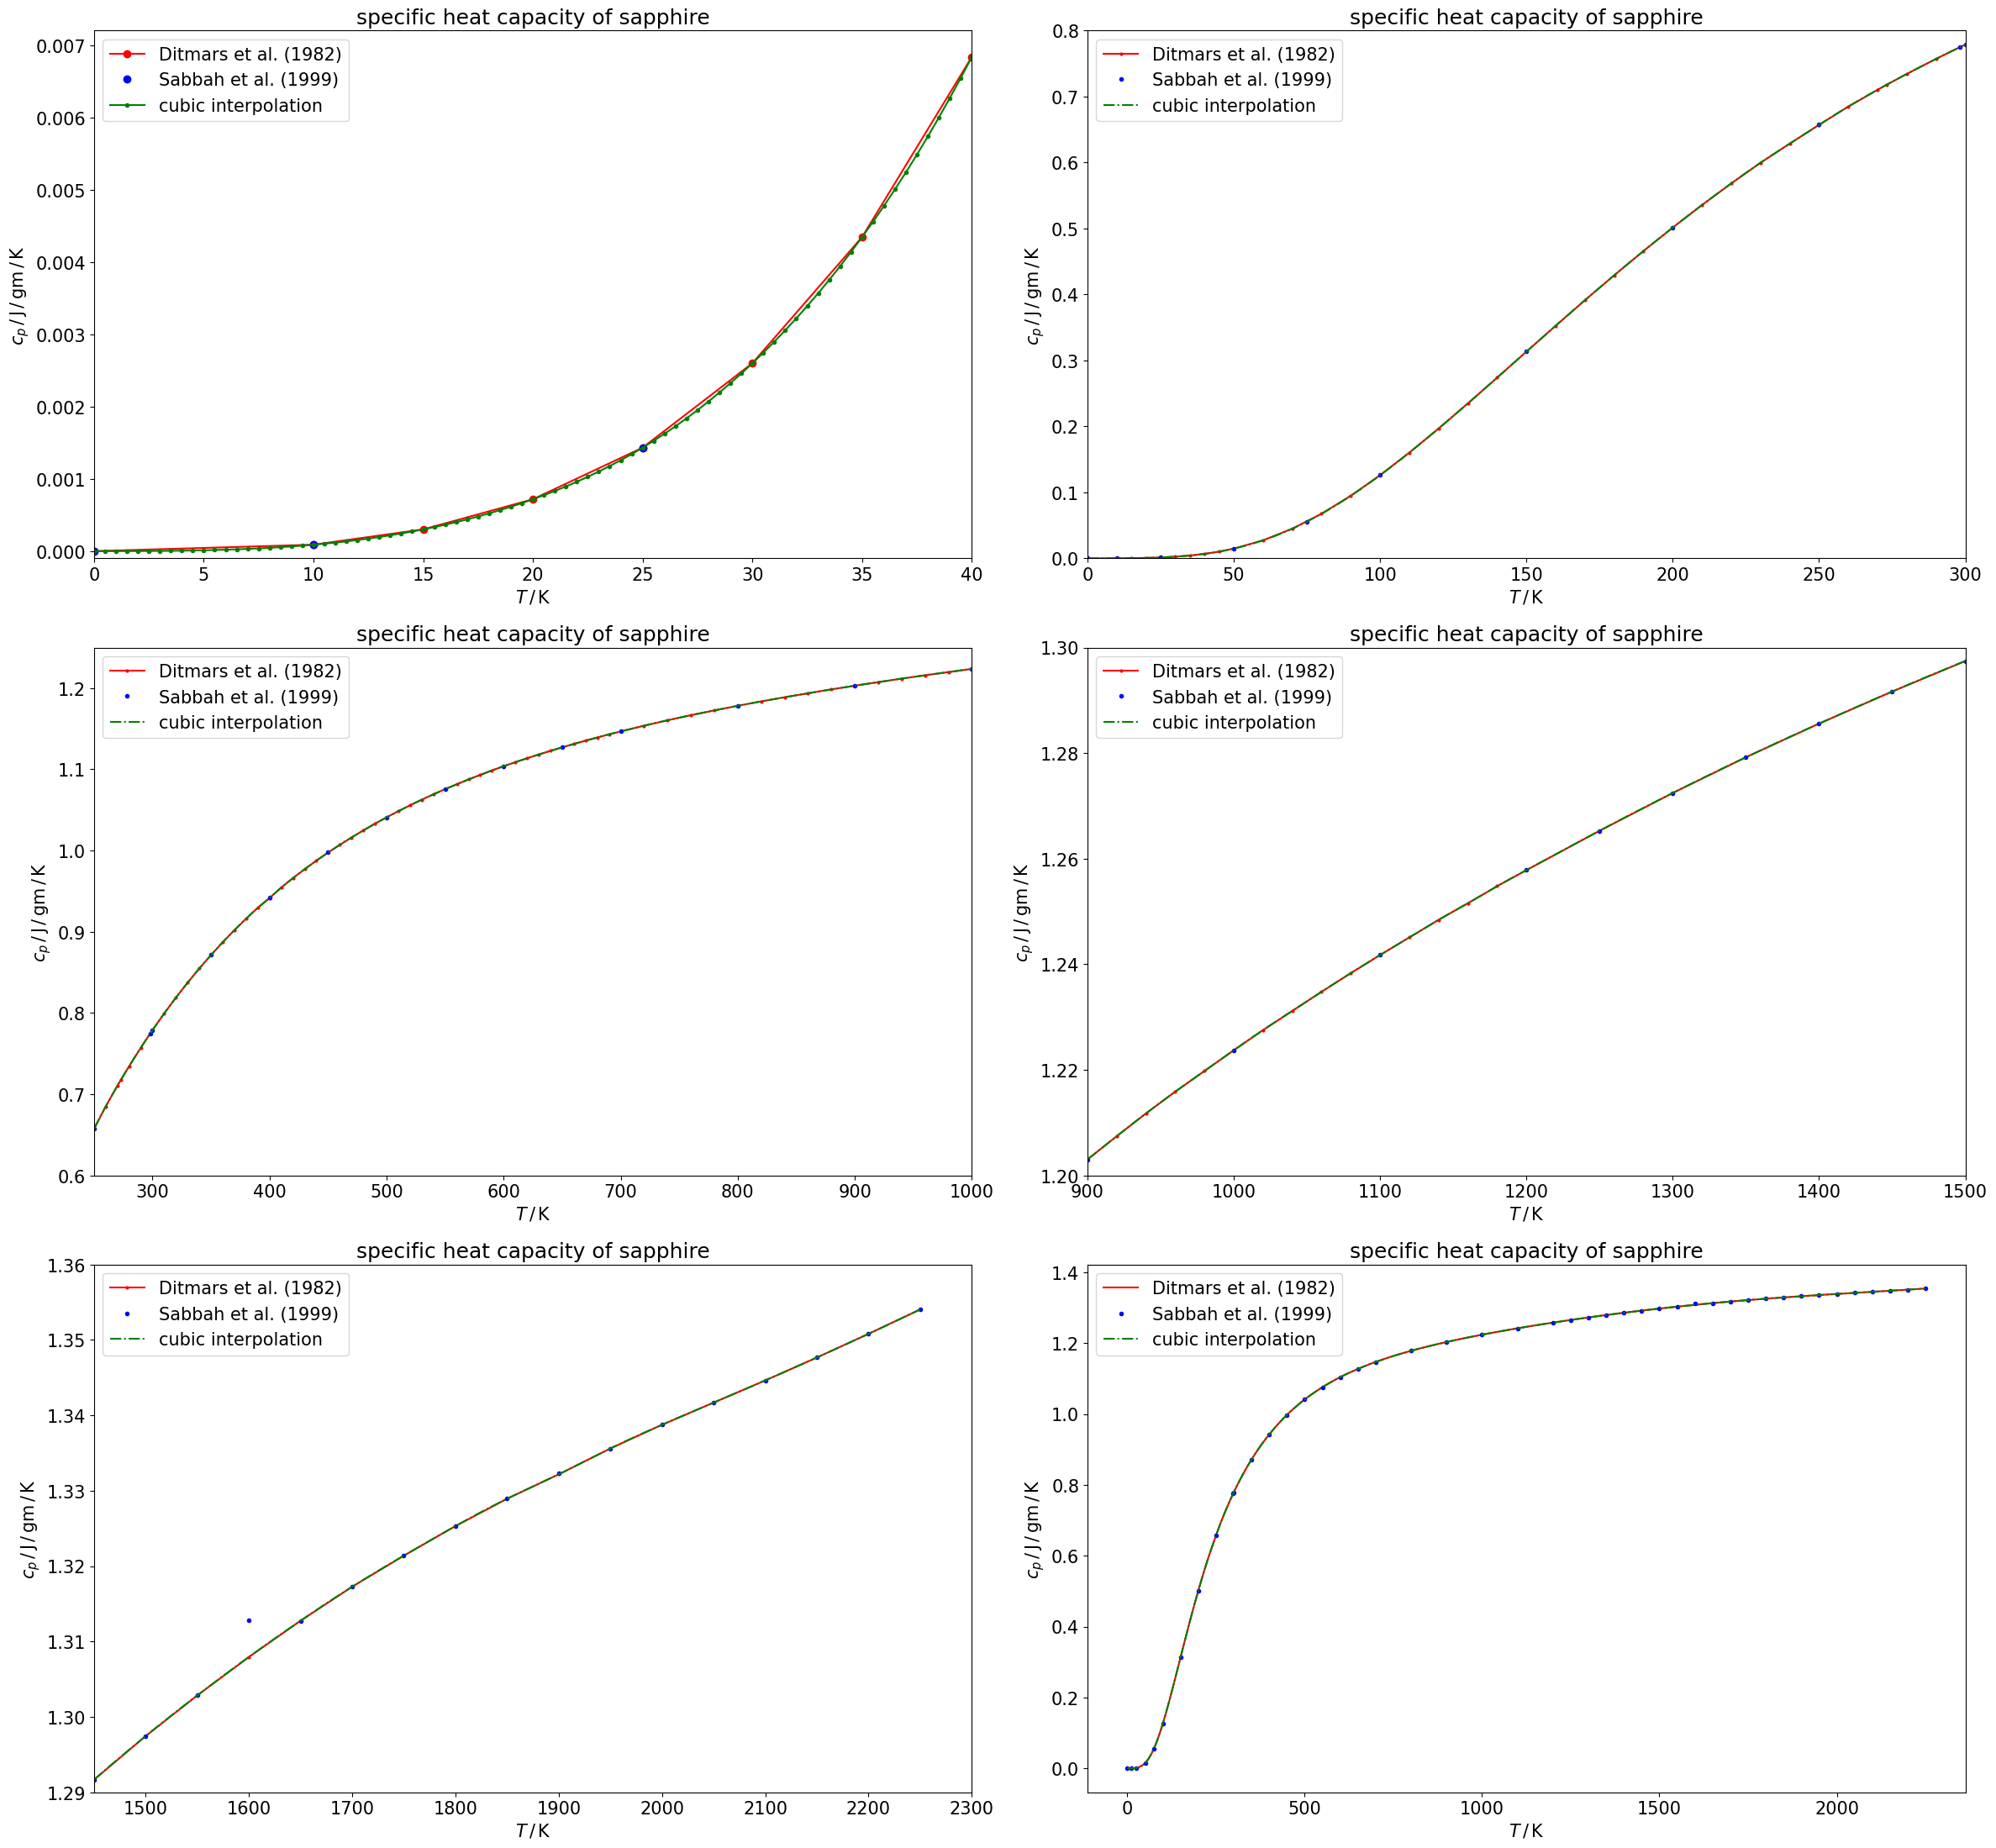

In [24]:
idx = 0
n_rows = 3
n_cols = 2
sz_h = 12
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

title_Cp = 'specific heat capacity of sapphire'

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.plot(K82, Cp82m, 'r.-', ms = 12, label = r'Ditmars et al. (1982)')
ax.plot(K99, Cp99m, 'b.',  ms = 12, label = r'Sabbah et al. (1999)')
tkvals = np.linspace(0, 40, 81)
cpvals = c_p_Al2O3(tkvals)
plt.plot(tkvals, cpvals, 'g.-', label = 'cubic interpolation')
plt.title(title_Cp)
plt.xlabel(label_T)
plt.ylabel(label_Cp)
plt.xlim(0, 40)
plt.ylim(-1e-4,0.0072)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.plot(K82, Cp82m, 'r.-', ms = 4, label = r'Ditmars et al. (1982)')
ax.plot(K99, Cp99m, 'b.',  ms = 6, label = r'Sabbah et al. (1999)')
tkvals = np.linspace(0, 300, 601)
cpvals = c_p_Al2O3(tkvals)
plt.plot(tkvals, cpvals, 'g-.', label = 'cubic interpolation')
plt.title(title_Cp)
plt.xlabel(label_T)
plt.ylabel(label_Cp)
plt.xlim(0, 300)
plt.ylim(0, 0.8)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.plot(K82, Cp82m, 'r.-', ms = 4, label = r'Ditmars et al. (1982)')
ax.plot(K99, Cp99m, 'b.',  ms = 6, label = r'Sabbah et al. (1999)')
tkvals = np.linspace(250, 1000, int(750 / 2 + 1))
cpvals = c_p_Al2O3(tkvals)
plt.plot(tkvals, cpvals, 'g-.', label = 'cubic interpolation')
plt.title(title_Cp)
plt.xlabel(label_T)
plt.ylabel(label_Cp)
plt.xlim( 250, 1000)
plt.ylim(0.60, 1.25)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.plot(K82, Cp82m, 'r.-', ms = 4, label = r'Ditmars et al. (1982)')
ax.plot(K99, Cp99m, 'b.',  ms = 6, label = r'Sabbah et al. (1999)')
tkvals = np.linspace(900, 1500, int(600 / 2 + 1))
cpvals = c_p_Al2O3(tkvals)
plt.plot(tkvals, cpvals, 'g-.', label = 'cubic interpolation')
plt.title(title_Cp)
plt.xlabel(label_T)
plt.ylabel(label_Cp)
plt.xlim( 900, 1500)
plt.ylim(1.20, 1.30)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.plot(K82, Cp82m, 'r.-', ms = 4, label = r'Ditmars et al. (1982)')
ax.plot(K99, Cp99m, 'b.',  ms = 6, label = r'Sabbah et al. (1999)')
tkvals = np.linspace(1450, 2250, int(800 / 2 + 1))
cpvals = c_p_Al2O3(tkvals)
plt.plot(tkvals, cpvals, 'g-.', label = 'cubic interpolation')
plt.title(title_Cp)
plt.xlabel(label_T)
plt.ylabel(label_Cp)
plt.xlim(1450, 2300)
plt.ylim(1.29, 1.36)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
ax.plot(K82, Cp82m, 'r-', ms = 4, label = r'Ditmars et al. (1982)')
ax.plot(K99, Cp99m, 'b.', ms = 6, label = r'Sabbah et al. (1999)')
tkvals = np.linspace(0, 2250, int(2250 / 5 + 1))
cpvals = c_p_Al2O3(tkvals)
plt.plot(tkvals, cpvals, 'g-.', label = 'cubic interpolation')
plt.title(title_Cp)
plt.xlabel(label_T)
plt.ylabel(label_Cp)
plt.legend()

plt.tight_layout()
plt.show()

### Internal energy density*

We integrate this function to determine the energy density per unit mass as a function of temperature:

In [25]:
trap_quad(c_p_Al2O3, 0., 2250., 2251)

2491.483070093268

In [26]:
scinteg.romberg(c_p_Al2O3, 0., 2250., divmax = 16, vec_func = True, show = True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7f912c9d8d90> from [0.0, 2250.0]

 Steps  StepSize   Results
     1 2250.000000 1523.298844 
     2 1125.000000 2163.312190 2376.649972 
     4 562.500000 2431.291316 2520.617692 2530.215540 
     8 281.250000 2495.363922 2516.721457 2516.461708 2516.243393 
    16 140.625000 2493.009096 2492.224154 2490.591001 2490.180355 2490.078147 
    32 70.312500 2491.509869 2491.010127 2490.929192 2490.934560 2490.937518 2490.938358 
    64 35.156250 2491.484641 2491.476232 2491.507306 2491.516482 2491.518764 2491.519332 2491.519474 
   128 17.578125 2491.484826 2491.484888 2491.485465 2491.485118 2491.484995 2491.484962 2491.484954 2491.484952 
   256  8.789062 2491.483523 2491.483088 2491.482968 2491.482929 2491.482920 2491.482918 2491.482918 2491.482917 2491.482917 
   512  4.394531 2491.483169 2491.483051 2491.483049 2491.483050 2491.483050 2491.483050 2491.483050 2491.483050 2491.483050 2491.483050 
  1024  2.197266 2491.483089

2491.483064118401

Now construct the relevant data arrays and a suitable interpolation:

In [27]:
tkvals = np.linspace(0, 2250, 2251)
uevals = np.asarray([ scinteg.romberg(c_p_Al2O3, 0, t, divmax = 16, vec_func = True) for t in tkvals ])
ue_v_T_Al2O3 = scinterp.interp1d(tkvals, uevals, 'cubic')
ue_v_T_Al2O3.__doc__ = 'Given temperature in K, return internal energy density of sapphire, Al2O3, in J/gm.'

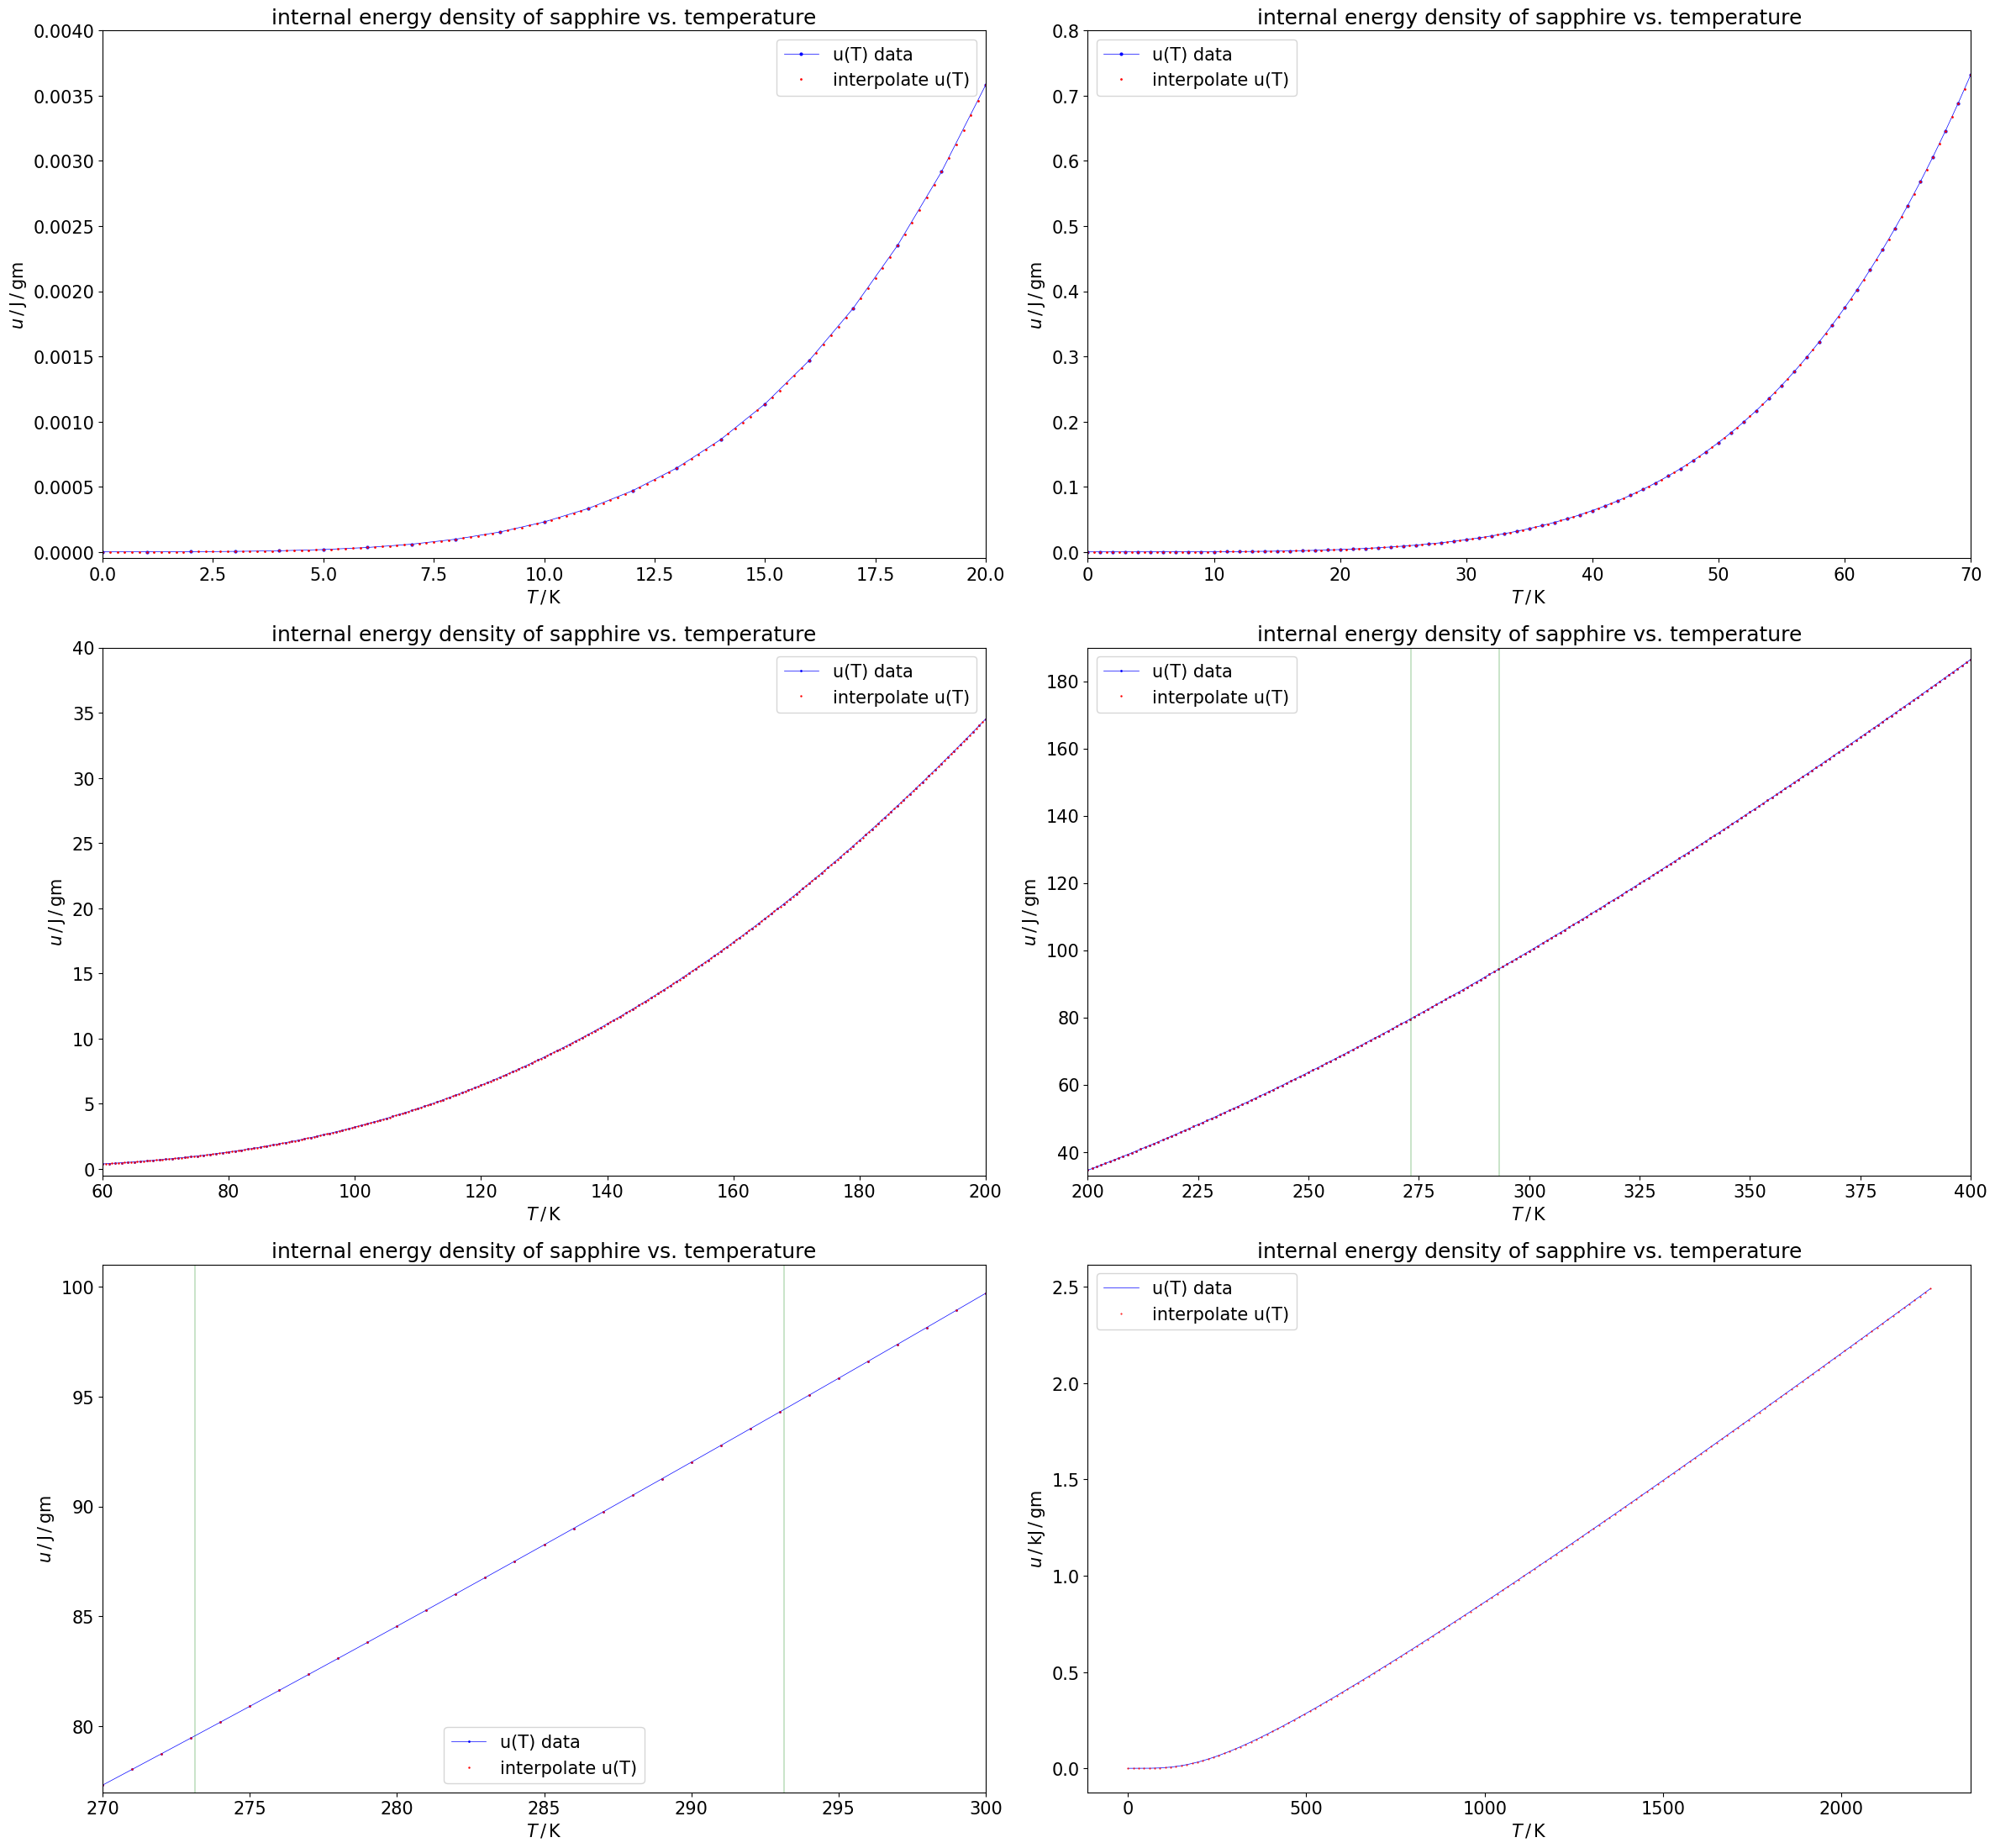

In [28]:
idx = 0
n_rows = 3
n_cols = 2
sz_h = 12
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

title_UvT = 'internal energy density of sapphire vs. temperature'

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(tkvals, uevals, 'b.-', ms = 4, lw = 0.5, label = 'u(T) data')
tvals = np.linspace(0., 20., 121)
plt.plot(tvals, ue_v_T_Al2O3(tvals), 'r.', ms = 2, label = 'interpolate u(T)')
plt.title(title_UvT)
plt.xlabel(label_T)
plt.ylabel(label_U)
plt.xlim(0,20)
plt.ylim(-50 * si_u, 0.004)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(tkvals, uevals, 'b.-', ms = 4, lw = 0.5, label = 'u(T) data')
tvals = np.linspace(0., 70., 141)
plt.plot(tvals, ue_v_T_Al2O3(tvals), 'r.', ms = 2, label = 'interpolate u(T)')
plt.title(title_UvT)
plt.xlabel(label_T)
plt.ylabel(label_U)
plt.xlim(0,70)
plt.ylim(-10. * si_m, 0.8)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(tkvals, uevals, 'b.-', ms = 2, lw = 0.5, label = 'u(T) data')
tvals = np.linspace(60., 200., 281)
plt.plot(tvals, ue_v_T_Al2O3(tvals), 'r.', ms = 1.5, label = 'interpolate u(T)')
plt.title(title_UvT)
plt.xlabel(label_T)
plt.ylabel(label_U)
plt.xlim(60,200)
plt.ylim(-0.5, 40)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(tkvals, uevals, 'b.-', ms = 2, lw = 0.5, label = 'u(T) data')
tvals = np.linspace(200., 400., 201)
plt.plot(tvals, ue_v_T_Al2O3(tvals), 'r.', ms = 1.5, label = 'interpolate u(T)')
plt.title(title_UvT)
plt.xlabel(label_T)
plt.ylabel(label_U)
plt.xlim(200, 400)
plt.ylim(33, 190)
vline(273.15, [33, 190], 'g-', wd = 0.3)
vline(293.15, [33, 190], 'g-', wd = 0.3)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(tkvals, uevals, 'b.-', ms = 2, lw = 0.5, label = 'u(T) data')
tvals = np.linspace(200., 400., 201)
plt.plot(tvals, ue_v_T_Al2O3(tvals), 'r.', ms = 1.5, label = 'interpolate u(T)')
plt.title(title_UvT)
plt.xlabel(label_T)
plt.ylabel(label_U)
plt.xlim(270, 300)
plt.ylim(77, 101)
vline(273.15, [75, 101], 'g-', wd = 0.3)
vline(293.15, [75, 101], 'g-', wd = 0.3)
plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(tkvals, uevals / si_k, 'b-', lw = 0.5, label = 'u(T) data')
tvals = np.linspace(0., 2250., 2250 // 15 + 1)
plt.plot(tvals, ue_v_T_Al2O3(tvals) / si_k, 'r.', ms = 1, label = 'interpolate u(T)')
plt.title(title_UvT)
plt.xlabel(label_T)
plt.ylabel(label_kU)
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
ue_v_T_Al2O3(273.15), ue_v_T_Al2O3(293.15)

(array(79.57850202), array(94.40721049))

In [32]:
ue_v_T_Al2O3(293.2), ue_v_T_Al2O3(297.4)

(array(94.44541856), array(97.67427758))

We can also construct an interpolation that goes the other way.
A particular challenge is that $T(u)$ is vertical near $u = 0$.
Because the interpolation is performed on the basis of splines,
we limit the domain for that function to temperatures that are
not too small.

In [30]:
ni = 30
print([tkvals[ni], uevals[ni]])
TvU_Al2O3_interp = scinterp.interp1d(uevals[ni:], tkvals[ni:], 'cubic')
TvU_Al2O3_interp(uevals[ni])

[30.0, 0.018662936458986708]


array(30.)

In [31]:
ue_v_T_Al2O3([36.7, 77.0, 298.15, 925.0])

array([4.37643147e-02, 1.09995235e+00, 9.82548541e+01, 7.71695593e+02])

In [32]:
TvU_Al2O3_interp(_)

array([ 36.70001155,  77.        , 298.15      , 925.        ])

And for very small energy values, we apply a root-finding algorithm to `TvU_Al2O3_interp`.
We thus define

In [33]:
def TvU_Al2O3(ue):
    if 0.0186630 <= ue:
        return TvU_Al2O3_interp(ue)
    else:
        return sciopt.root(lambda tk: ue_v_T_Al2O3(tk) - ue, 15.).x[0]

In [34]:
np.asarray([ TvU_Al2O3(u) for u in np.linspace(0.001, 0.030, 30) ])

array([14.53068741, 17.29014077, 19.13433832, 20.55827881, 21.7335595 ,
       22.74130444, 23.62706635, 24.41944415, 25.13773719, 25.79568693,
       26.40347795, 26.96890269, 27.49805841, 27.9957879 , 28.46601621,
       28.91195852, 29.3362921 , 29.74126105, 30.12861644, 30.50021512,
       30.85763009, 31.20181811, 31.53373593, 31.85434033, 32.16457873,
       32.46521535, 32.75684694, 33.04006401, 33.31541714, 33.58335221])

In [35]:
ue_v_T_Al2O3(_)

array([0.001     , 0.002     , 0.003     , 0.004     , 0.005     ,
       0.006     , 0.007     , 0.008     , 0.009     , 0.01      ,
       0.011     , 0.012     , 0.013     , 0.014     , 0.015     ,
       0.016     , 0.017     , 0.018     , 0.01899959, 0.01999935,
       0.02099979, 0.02200022, 0.02300031, 0.0240001 , 0.02499996,
       0.02599998, 0.027     , 0.02800001, 0.02900008, 0.0300001 ])

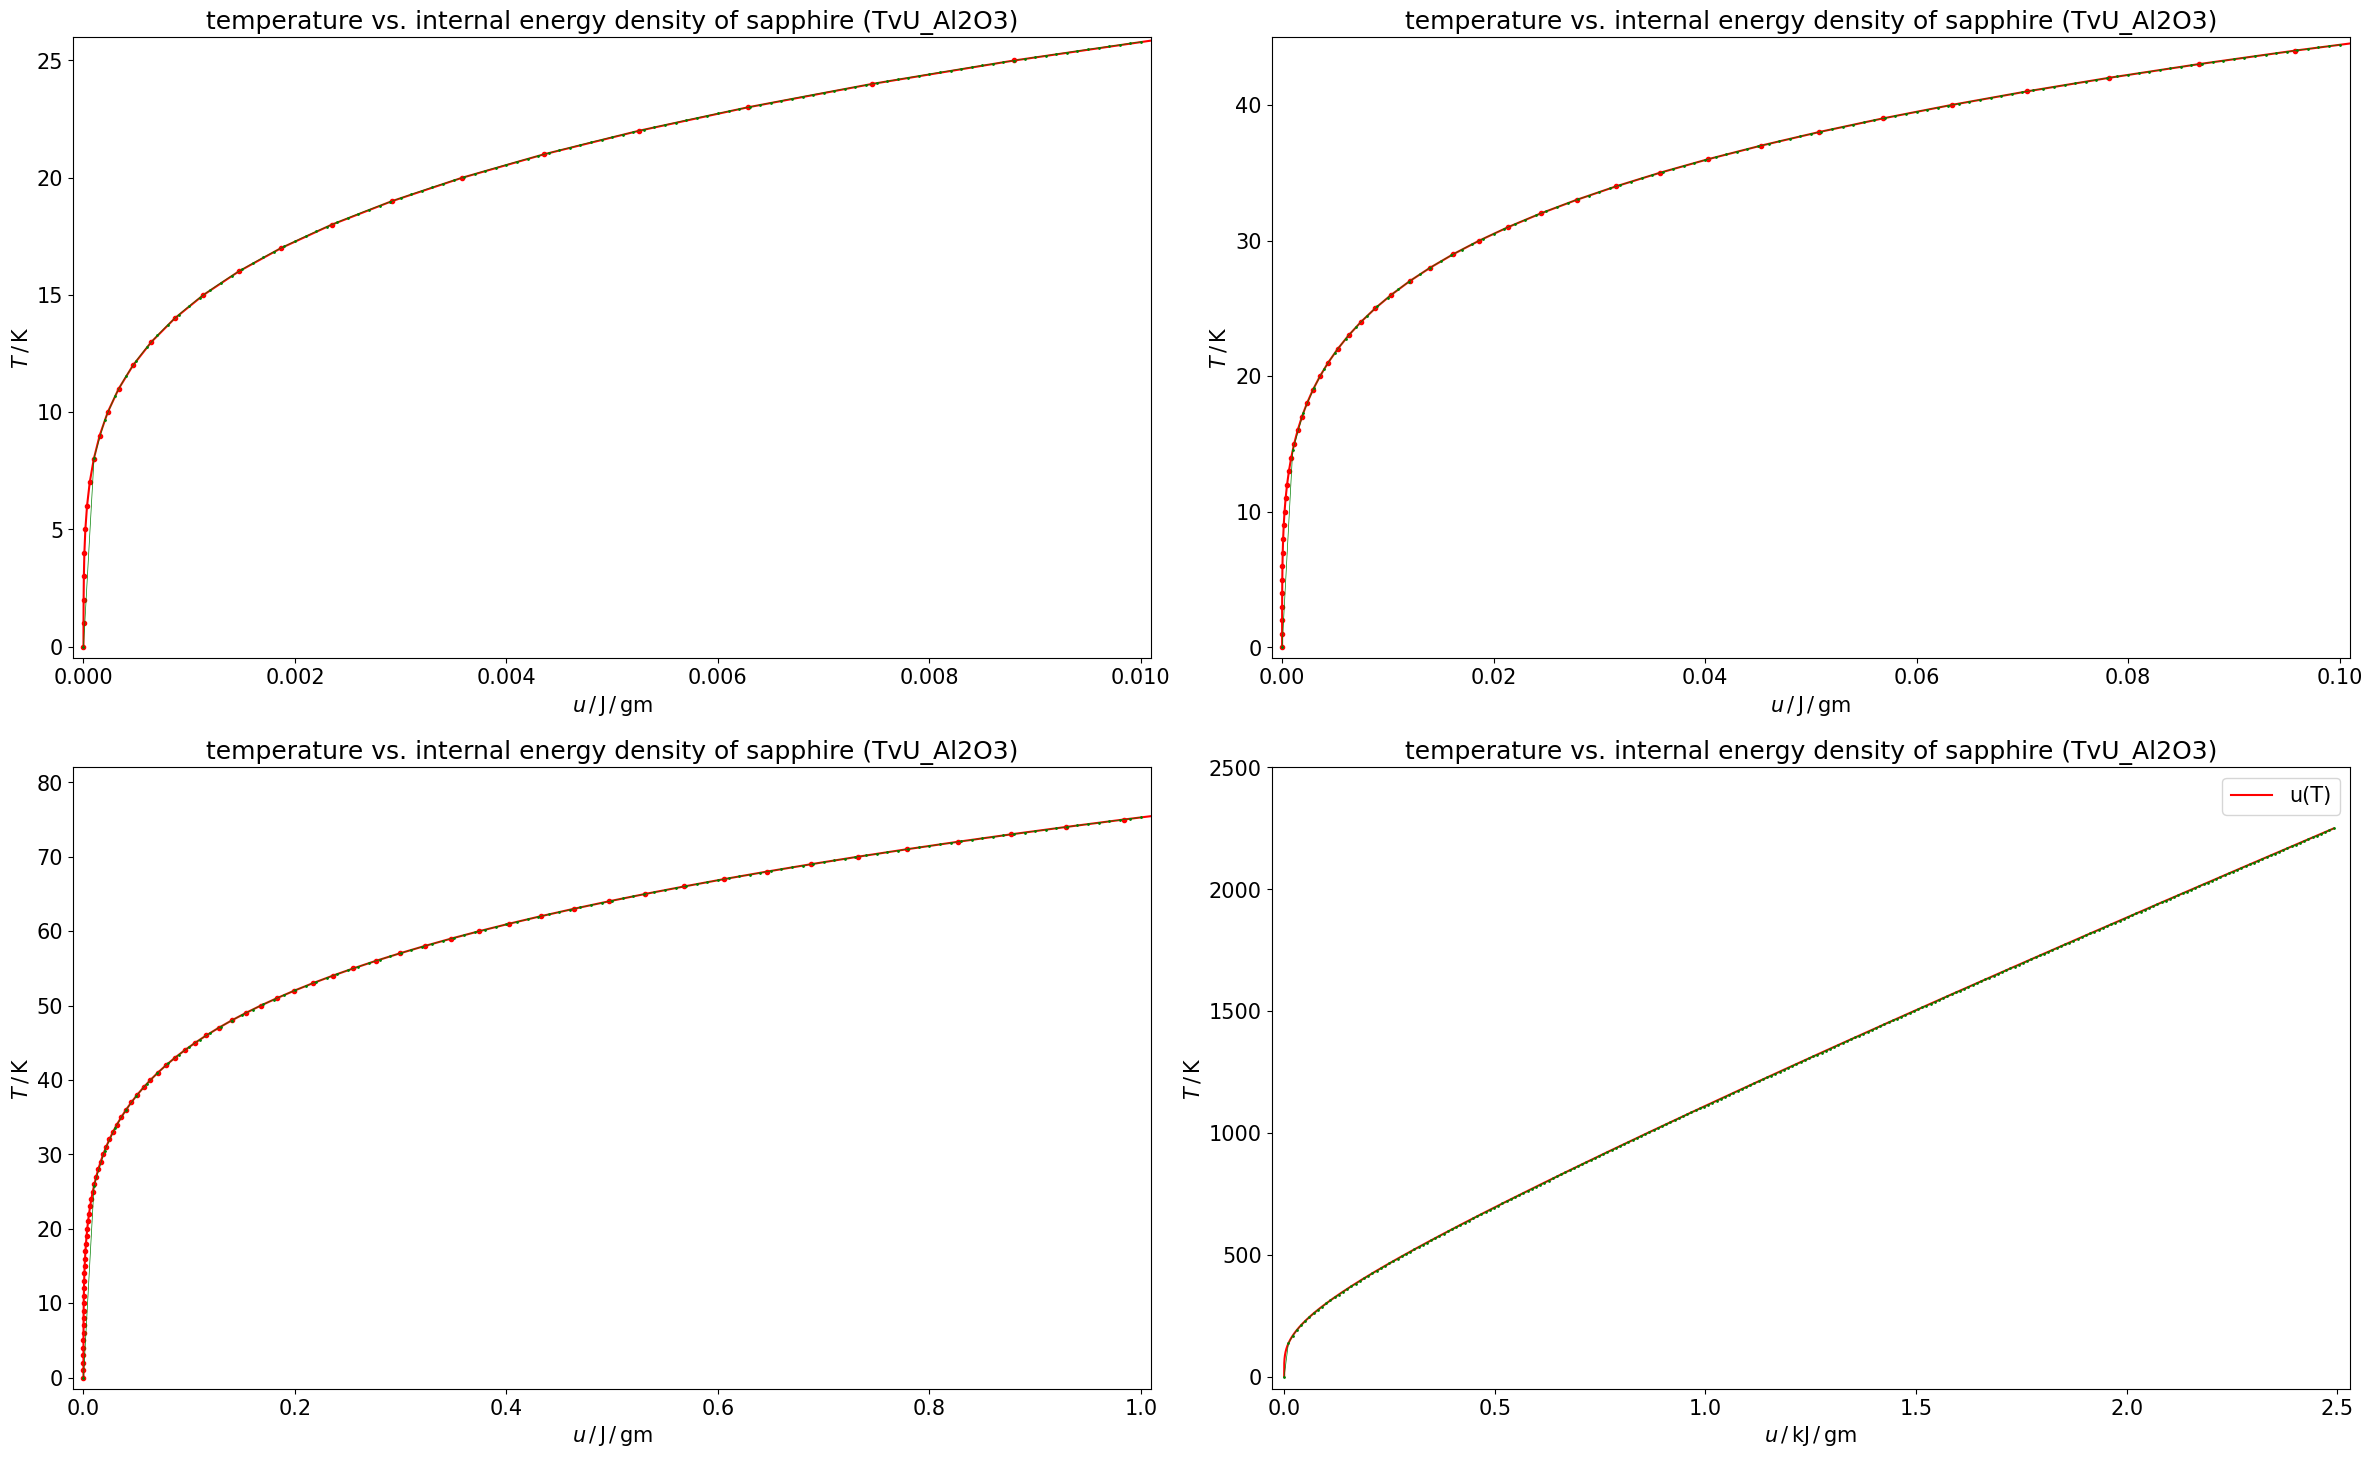

In [36]:
idx = 0
n_rows = 2
n_cols = 2
sz_h = 12
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

title_TvU = 'temperature vs. internal energy density of sapphire (TvU_Al2O3)'

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(uevals, tkvals, 'r.-')
uvals = np.linspace(0, 0.01, 101)
tvals = np.asarray([ TvU_Al2O3(u) for u in uvals ])
plt.plot(uvals, tvals, 'g.-', ms = 2, lw = 0.5)
plt.title(title_TvU)
plt.xlabel(label_U)
plt.ylabel(label_T)
plt.xlim(-0.0001, 0.0101)
plt.ylim(-0.5, 26)
# plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(uevals, tkvals, 'r.-')
uvals = np.linspace(0, 0.1, 101)
tvals = np.asarray([ TvU_Al2O3(u) for u in uvals ])
plt.plot(uvals, tvals, 'g.-', ms = 2, lw = 0.5)
plt.title(title_TvU)
plt.xlabel(label_U)
plt.ylabel(label_T)
plt.xlim(-0.001, 0.101)
plt.ylim(-0.8, 45)
# plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(uevals, tkvals, 'r.-')
uvals = np.linspace(0, 1, 101)
tvals = np.asarray([ TvU_Al2O3(u) for u in uvals ])
plt.plot(uvals, tvals, 'g.-', ms = 2, lw = 0.5)
plt.title(title_TvU)
plt.xlabel(label_U)
plt.ylabel(label_T)
plt.xlim(-0.01, 1.01)
plt.ylim(-1.5, 82)
# plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(uevals / si_k, tkvals, 'r-', label = 'u(T)')
uvals = np.linspace(0, 2491, 251)
tvals = np.asarray([ TvU_Al2O3(u) for u in uvals ])
plt.plot(uvals / si_k, tvals, 'g.-', ms = 2, lw = 0.5)
plt.title(title_TvU)
plt.xlabel(label_kU)
plt.ylabel(label_T)
plt.xlim(-0.03, 2.53)
plt.ylim(-50, 2500)
plt.legend()

plt.tight_layout()
plt.show()

As an alternative, we can try using the root-finding approach throughout the domain:

In [37]:
def T_from_UvT_Al2O3(ue):
    return sciopt.root(lambda tk: ue_v_T_Al2O3(tk) - ue, 0.8 * ue).x[0]

In [38]:
np.asarray([ T_from_UvT_Al2O3(u) for u in np.linspace(0.001, 0.030, 30) ])

array([14.53068741, 17.29014077, 19.13433832, 20.55827881, 21.7335595 ,
       22.74130444, 23.62706635, 24.41944415, 25.13773719, 25.79568693,
       26.40347795, 26.96890269, 27.49805841, 27.9957879 , 28.46601621,
       28.91195852, 29.3362921 , 29.74126105, 30.12877126, 30.50045174,
       30.85770203, 31.2017422 , 31.53363361, 31.85430767, 32.16459233,
       32.46522118, 32.75684792, 33.0400622 , 33.31539565, 33.58332617])

In [39]:
ue_v_T_Al2O3(_)

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 ])

This latter approach is marred by the need to supply the root finder
with a good initial guess. Consider, for example,

In [40]:
try:
    T_from_UvT_Al2O3(35.)
except:
    print('An exception occurred')

An exception occurred


This second version appears to work throughout the range of interest:

In [41]:
def T_from_UvT_Al2O3(ue):
    if ue < 150.:
        ti = 15.
    else:
        ti = 0.8 * ue + 250.
    return sciopt.root(lambda tk: ue_v_T_Al2O3(tk) - ue, ti).x[0]

In [42]:
for ue in np.linspace(0.001, 0.030, 30):
    try:
        T_from_UvT_Al2O3(ue)
    except:
        print('An exception occurred at ue = {0:4.2f}.'.format(ue))

In [43]:
for ue in np.linspace(0.03, 1.00, 71):
    try:
        T_from_UvT_Al2O3(ue)
    except:
        print('An exception occurred at ue = {0:4.2f}.'.format(ue))

In [44]:
for ue in np.linspace(1., 50., 99):
    try:
        T_from_UvT_Al2O3(ue)
    except:
        print('An exception occurred at ue = {0:4.2f}.'.format(ue))

In [45]:
for ue in np.linspace(1., 2491., 2491):
    try:
        T_from_UvT_Al2O3(ue)
    except:
        print('An exception occurred at ue = {0:4.2f}.'.format(ue))

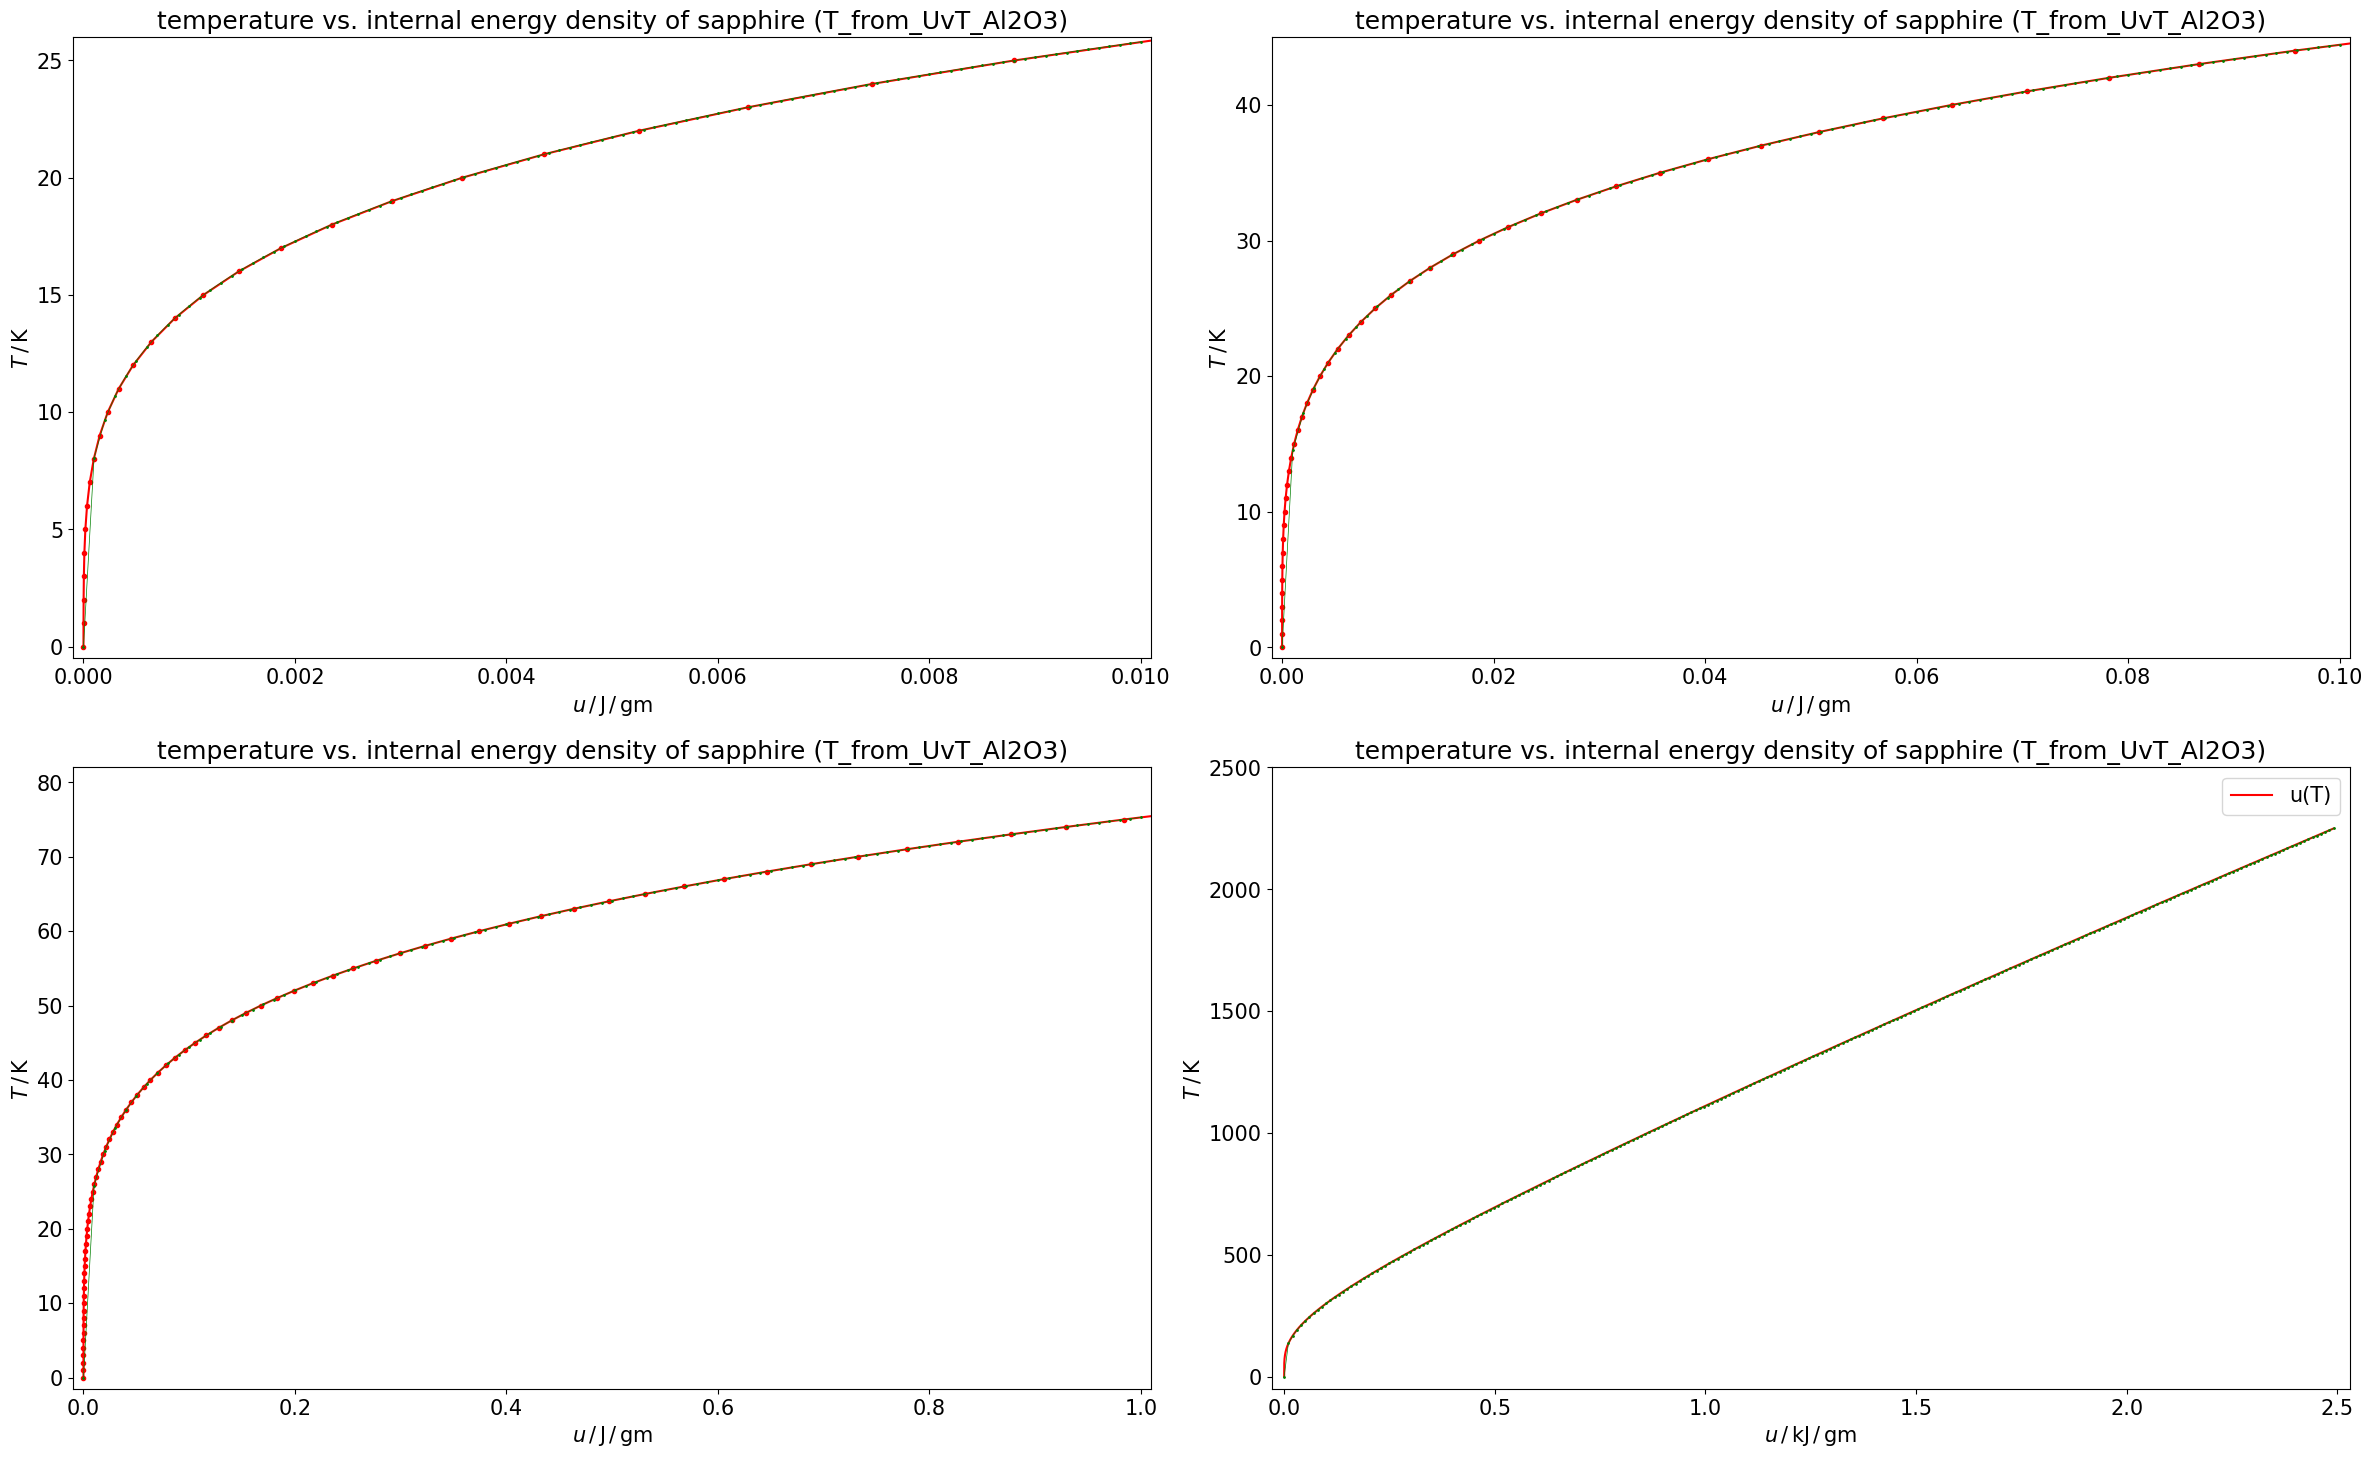

In [46]:
idx = 0
n_rows = 2
n_cols = 2
sz_h = 12
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

title_TvU = 'temperature vs. internal energy density of sapphire (T_from_UvT_Al2O3)'

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(uevals, tkvals, 'r.-')
uvals = np.linspace(0, 0.01, 101)
tvals = np.asarray([ T_from_UvT_Al2O3(u) for u in uvals ])
plt.plot(uvals, tvals, 'g.-', ms = 2, lw = 0.5)
plt.title(title_TvU)
plt.xlabel(label_U)
plt.ylabel(label_T)
plt.xlim(-0.0001, 0.0101)
plt.ylim(-0.5, 26)
# plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(uevals, tkvals, 'r.-')
uvals = np.linspace(0, 0.1, 101)
tvals = np.asarray([ T_from_UvT_Al2O3(u) for u in uvals ])
plt.plot(uvals, tvals, 'g.-', ms = 2, lw = 0.5)
plt.title(title_TvU)
plt.xlabel(label_U)
plt.ylabel(label_T)
plt.xlim(-0.001, 0.101)
plt.ylim(-0.8, 45)
# plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(uevals, tkvals, 'r.-')
uvals = np.linspace(0, 1, 101)
tvals = np.asarray([ T_from_UvT_Al2O3(u) for u in uvals ])
plt.plot(uvals, tvals, 'g.-', ms = 2, lw = 0.5)
plt.title(title_TvU)
plt.xlabel(label_U)
plt.ylabel(label_T)
plt.xlim(-0.01, 1.01)
plt.ylim(-1.5, 82)
# plt.legend()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(uevals / si_k, tkvals, 'r-', label = 'u(T)')
uvals = np.linspace(0, 2491, 251)
tvals = np.asarray([ T_from_UvT_Al2O3(u) for u in uvals ])
plt.plot(uvals / si_k, tvals, 'g.-', ms = 2, lw = 0.5)
plt.title(title_TvU)
plt.xlabel(label_kU)
plt.ylabel(label_T)
plt.xlim(-0.03, 2.53)
plt.ylim(-50, 2500)
plt.legend()

plt.tight_layout()
plt.show()

### Thermal conductivity*

Using a [web-based digitizer](https://automeris.io/WebPlotDigitizer/), I extracted from a
[technical data sheet](https://rayotek.com/PDF/Sapphire-Optical-and-Thermal-Properties-Graph.pdf)
values for sapphire’s thermal conductivity as a function of temperature.
We know that doping sapphire with Ti changes the thermal conductivity, but starting with sapphire
seems a reasonable starting point.

I have two files containing the extracted data:

In [47]:
[ f for f in ls(nb_dir) if 'csv' in f or 'txt' in f]

['KvT_0-200.csv', 'KvT_200-1800.csv']

In [48]:
KvT0 = read_csv_numdata('KvT_0-200.csv')
KvT1 = read_csv_numdata('KvT_200-1800.csv')

The following figures indicate very clearly the need to clean up the extracted data values:

In [49]:
label_K = r'$\kappa$ / W / cm / K'

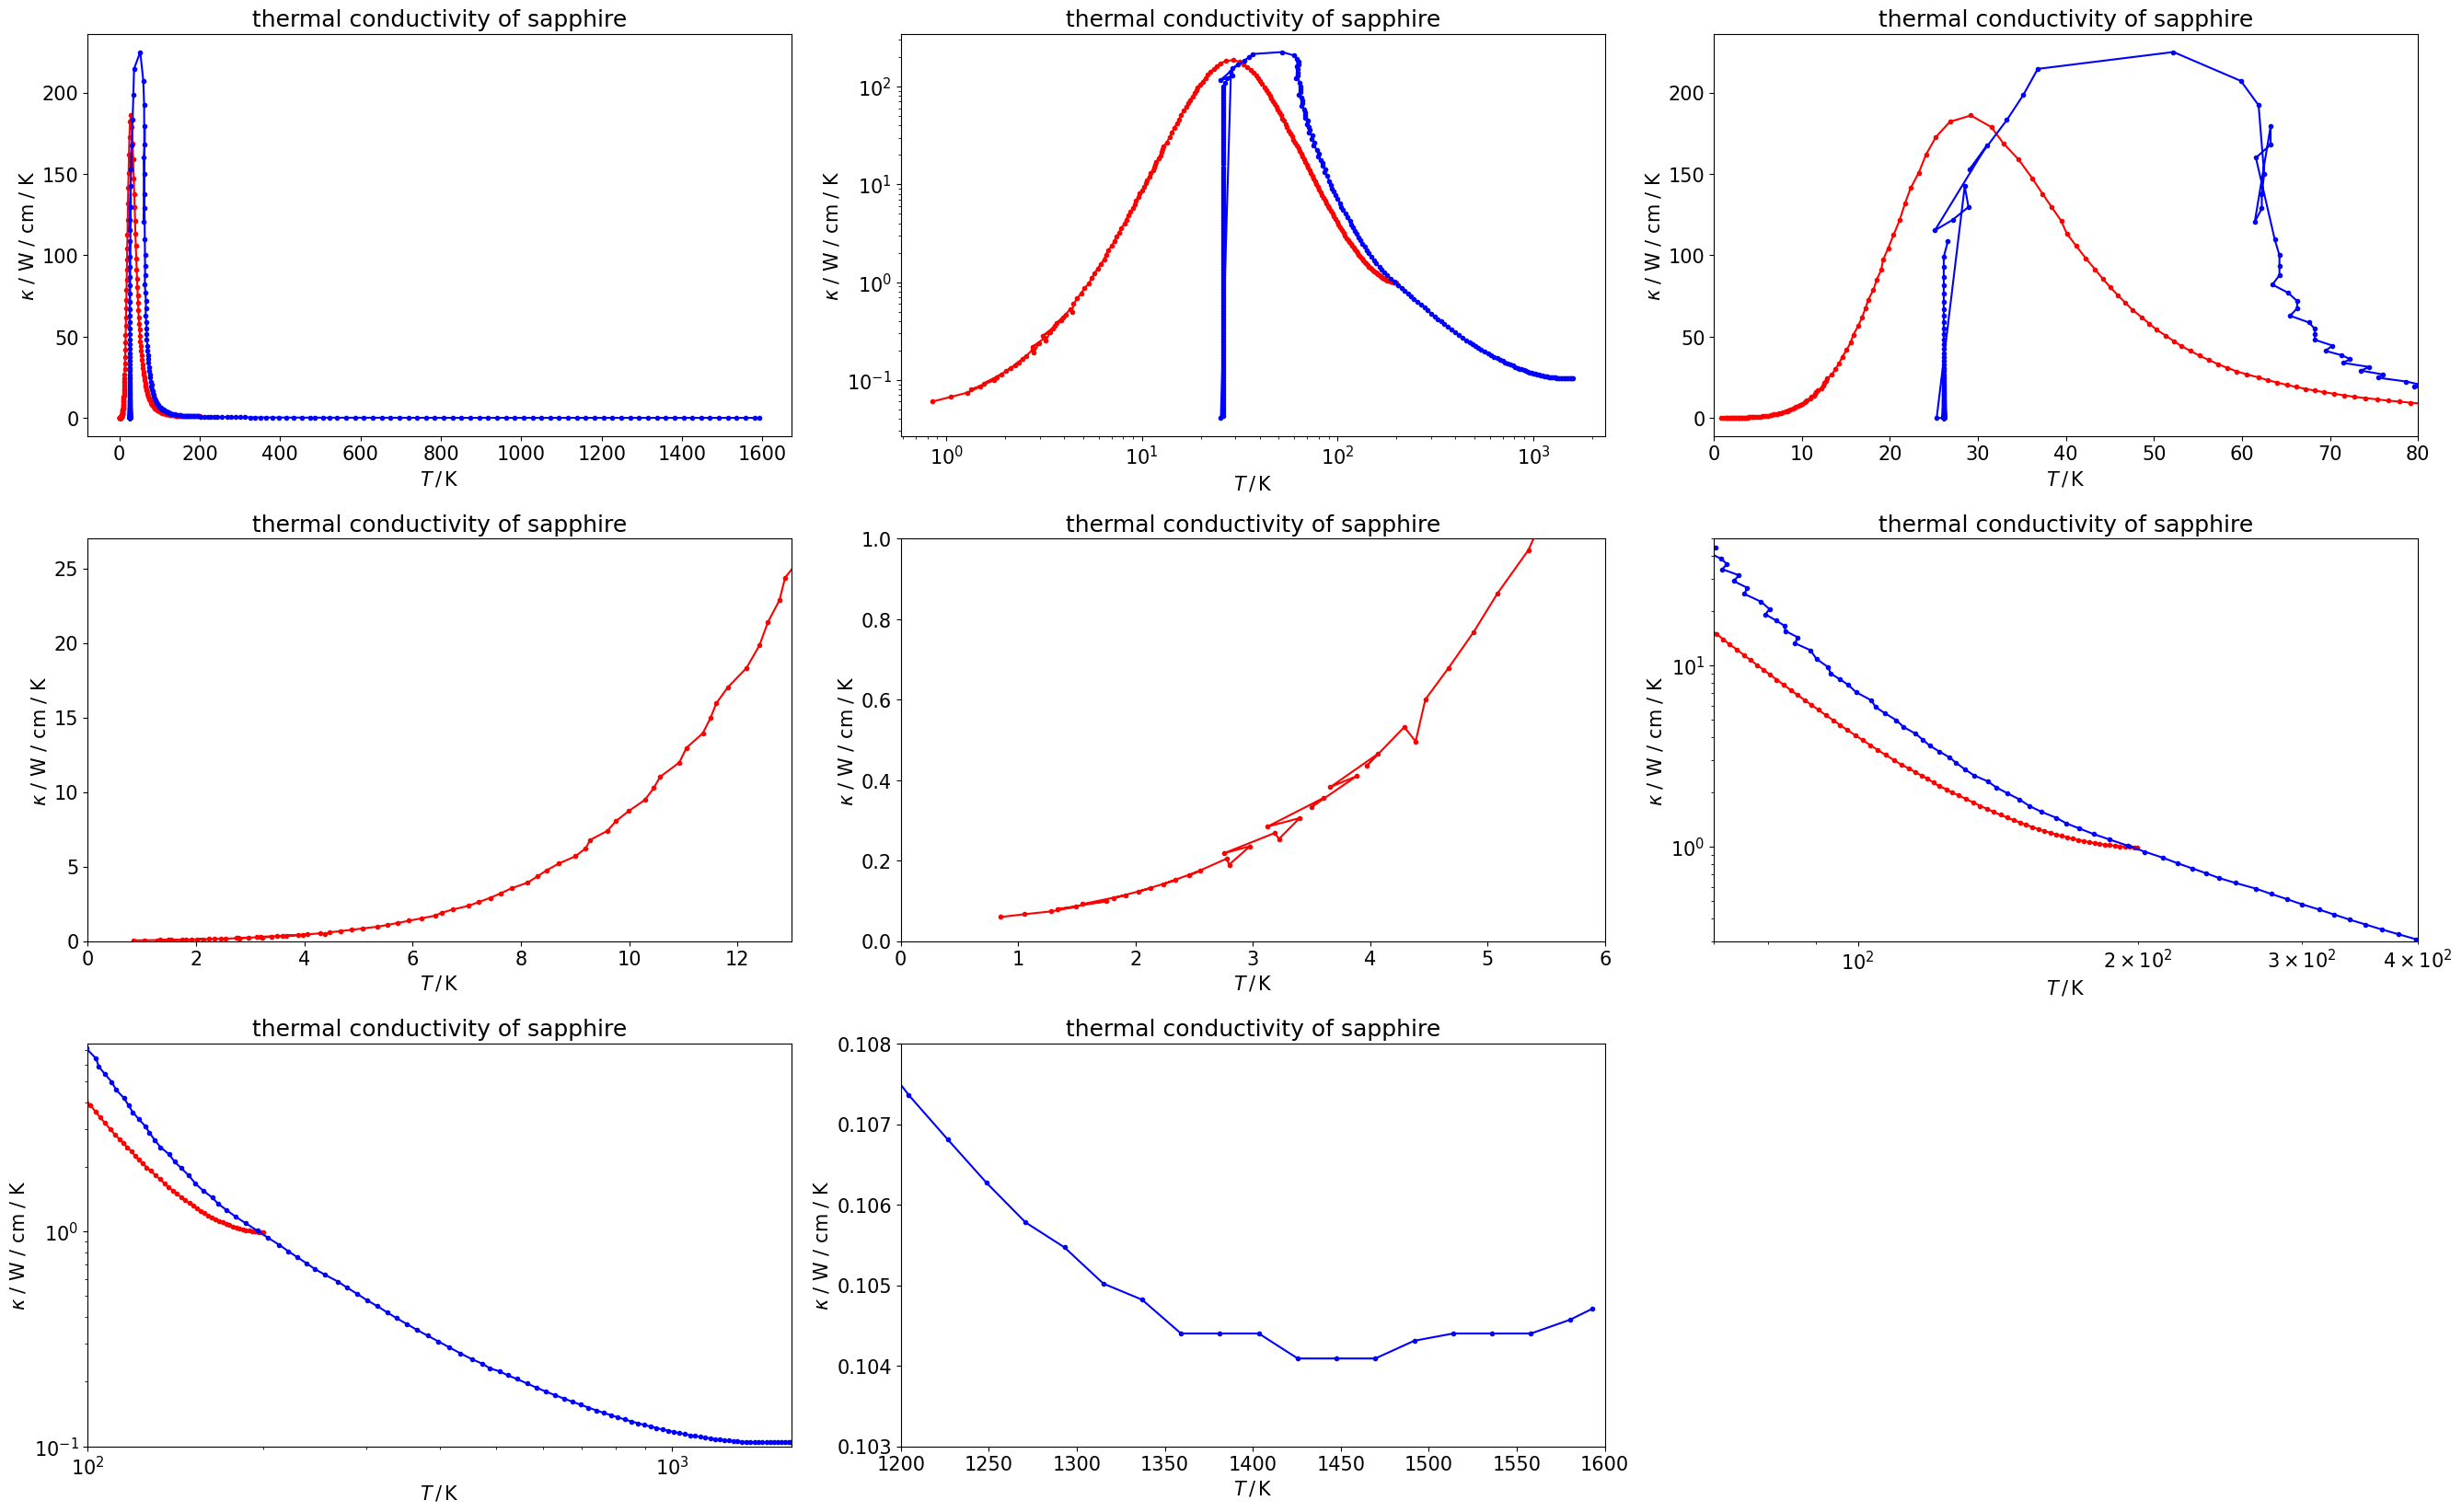

In [50]:
idx = 0
n_rows = 3
n_cols = 3
sz_h = 9
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

title_K = 'thermal conductivity of sapphire'

# K v. T (full)
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(KvT0[:,0], KvT0[:,1], 'r.-')
plt.plot(KvT1[:,0], KvT1[:,1], 'b.-')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)

# K v. T (logarithmic)
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.loglog(KvT0[:,0], KvT0[:,1], 'r.-')
plt.loglog(KvT1[:,0], KvT1[:,1], 'b.-')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)

# K v. T (zoom 1)
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(KvT0[:,0], KvT0[:,1], 'r.-')
plt.plot(KvT1[:,0], KvT1[:,1], 'b.-')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.xlim(0, 80)
# plt.ylim(0,100)

# K v. T (zoom 2)
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(KvT0[:,0], KvT0[:,1], 'r.-')
plt.plot(KvT1[:,0], KvT1[:,1], 'b.-')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.xlim(0, 13)
plt.ylim(0, 27)

# K v. T (zoom 3)
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(KvT0[:,0], KvT0[:,1], 'r.-')
plt.plot(KvT1[:,0], KvT1[:,1], 'b.-')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.xlim(0, 6)
plt.ylim(0, 1)

# K v. T (zoom 4)
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.loglog(KvT0[:,0], KvT0[:,1], 'r.-')
plt.loglog(KvT1[:,0], KvT1[:,1], 'b.-')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.xlim(70, 400)
plt.ylim(0.3, 50)

# K v. T (zoom 5)
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.loglog(KvT0[:,0], KvT0[:,1], 'r.-')
plt.loglog(KvT1[:,0], KvT1[:,1], 'b.-')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.xlim(100, 1600)
plt.ylim(0.1, 7.5)

# K v. T (zoom 6)
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(KvT0[:,0], KvT0[:,1], 'r.-')
plt.plot(KvT1[:,0], KvT1[:,1], 'b.-')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.xlim(1200, 1600)
plt.ylim(0.103, 0.108)

plt.tight_layout()
plt.show()

First sort the data so as to have the temperature values in strictly increasing order:

In [51]:
KvT0s = KvT0[KvT0[:,0].argsort()]
KvT1s = KvT1[KvT1[:,0].argsort()]

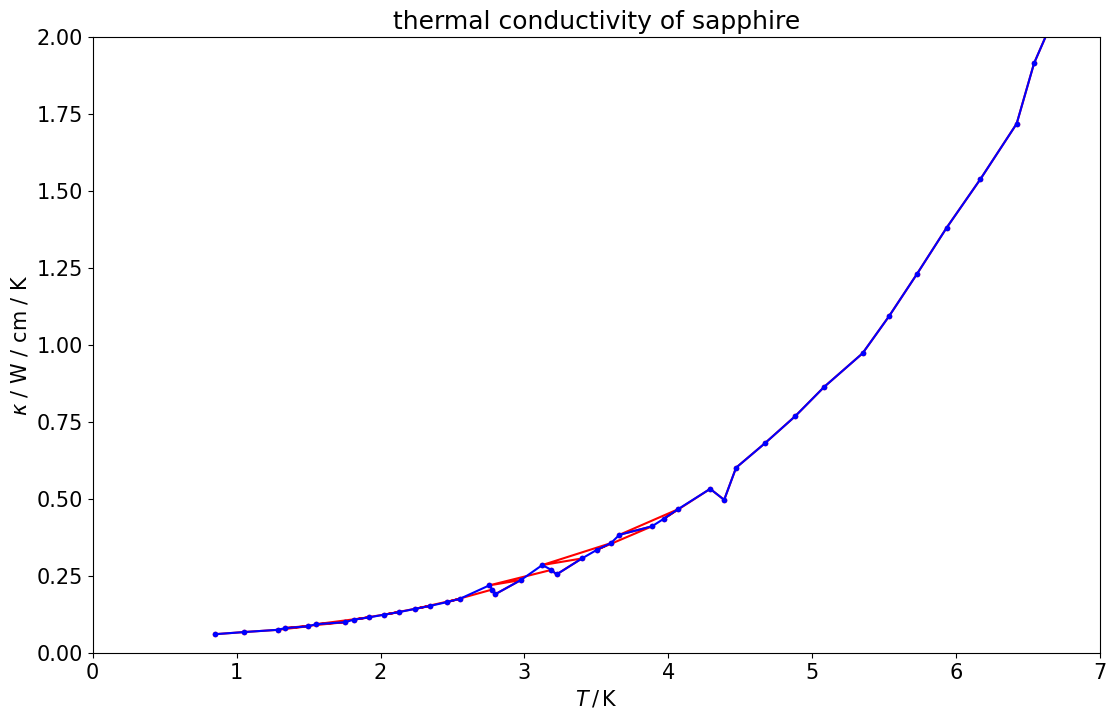

In [52]:
fig = plt.figure(figsize=(13,8))
plt.plot(KvT0[:,0], KvT0[:,1], 'r.-')
plt.plot(KvT0s[:,0], KvT0s[:,1], 'b.-')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.xlim(0,7)
plt.ylim(0,2)
plt.show()

Here, after some trial and error (identified via plotting),
we identify points to delete from the low-temperature dataset:

In [53]:
delPoints0 = np.asarray([
      4,   6,   8,   9,  16,  18,  20,  22,  24,  25,  26,  27,  31,
     36,  41,  42,  44,  48,  49,  53,  55,  59,  61,  63,  65,  66,
     67,  70,  71,  72,  78,  81,  84,  86,  89,  90,  93, 105, 127
    ]) - 1

In [54]:
KvT0x = np.delete(KvT0s, delPoints0, 0)

In order to stitch together the two datasets, we also need to delete a range
of points in the region where they overlap with a slope discontinuity.
In addition, some points at the upper end of the high-temperature dataset
appear to contain a lot of noise, so we delete those as well.

In [55]:
KvT0x = KvT0x[:len(KvT0x)-31]
KvT1x = KvT1s[236:len(KvT1s)-15]

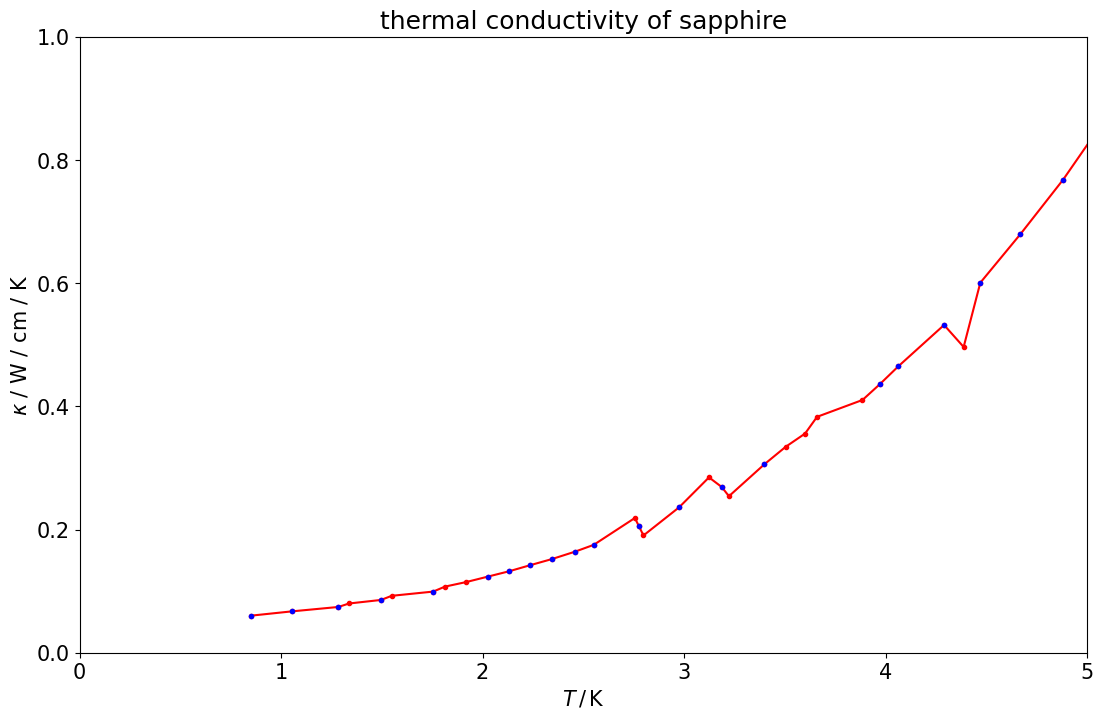

In [56]:
fig = plt.figure(figsize=(13,8))
plt.plot(KvT0s[:,0], KvT0s[:,1], 'r.-')
plt.plot(KvT0x[:,0], KvT0x[:,1], 'b.')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.xlim(0,5)
plt.ylim(0,1)
plt.show()

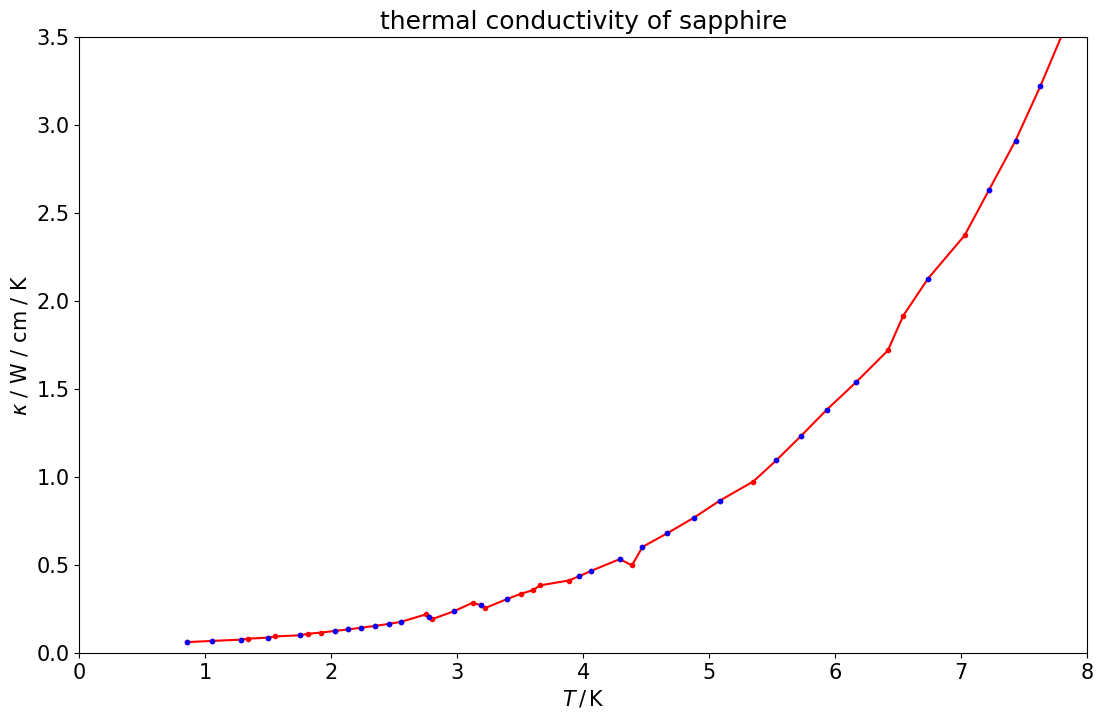

In [57]:
fig = plt.figure(figsize=(13,8))
plt.plot(KvT0s[:,0], KvT0s[:,1], 'r.-')
plt.plot(KvT0x[:,0], KvT0x[:,1], 'b.')
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.xlim(0,8)
plt.ylim(0,3.5)
plt.show()

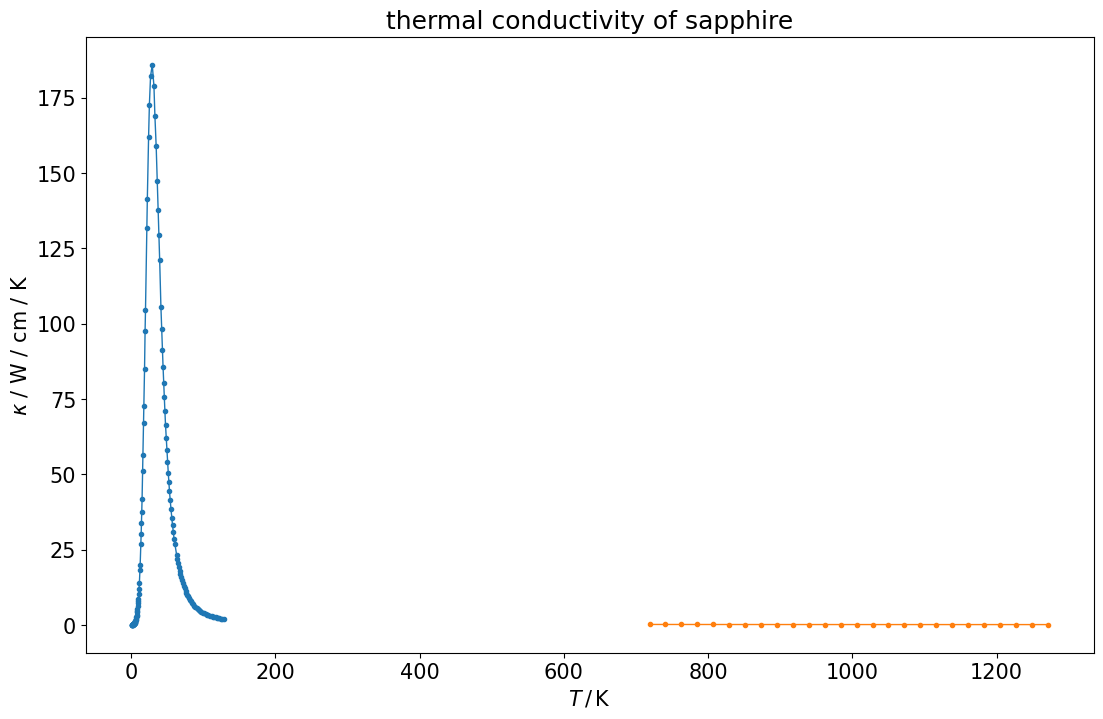

In [58]:
fig = plt.figure(figsize=(13,8))
plt.plot(KvT0x[:,0], KvT0x[:,1], '.-', lw = 1)
plt.plot(KvT1x[:,0], KvT1x[:,1], '.-', lw = 1)
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.show()

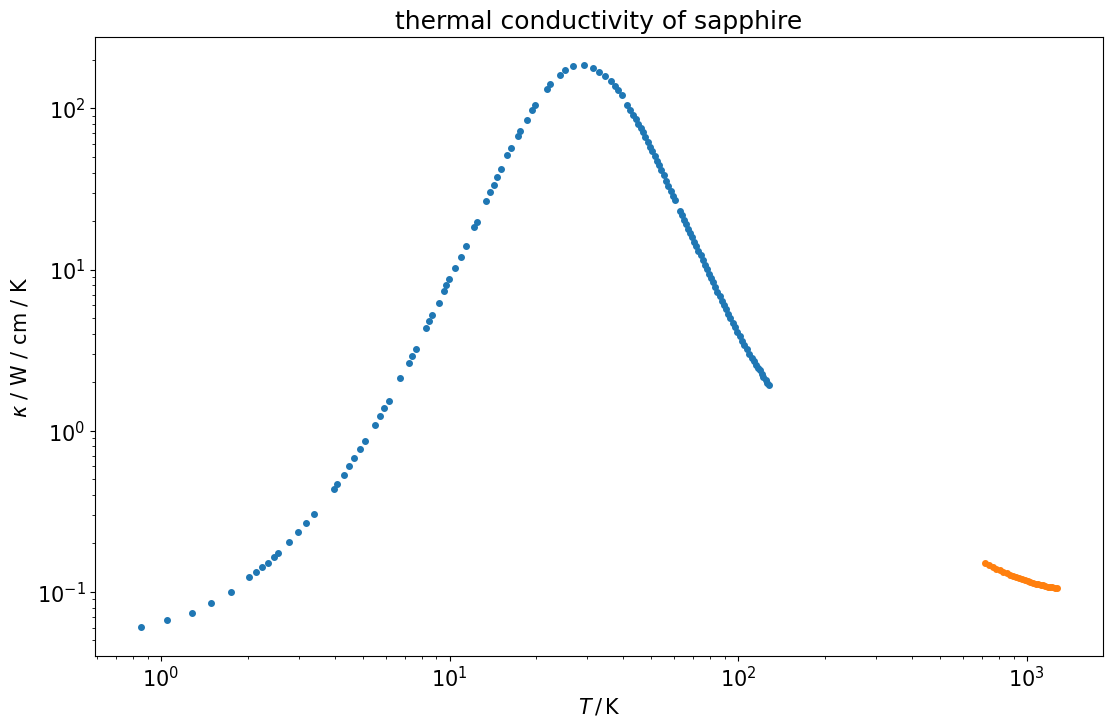

In [59]:
sz_h = 13
sz_v = sz_h / gr
fig = plt.figure(figsize = (sz_h, sz_v))

plt.loglog(KvT0x[:,0], KvT0x[:,1], '.', ms = 8)
plt.loglog(KvT1x[:,0], KvT1x[:,1], '.', ms = 8)
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.show()

That large gap, which spans room temperature(!), is not easily bridged
by quadratic or cubic spline interpolators:

In [60]:
KvT = np.append(KvT0x, KvT1x, 0)
thermalK_Al2O3 = scinterp.interp1d(KvT[:,0], KvT[:,1], 'quadratic')

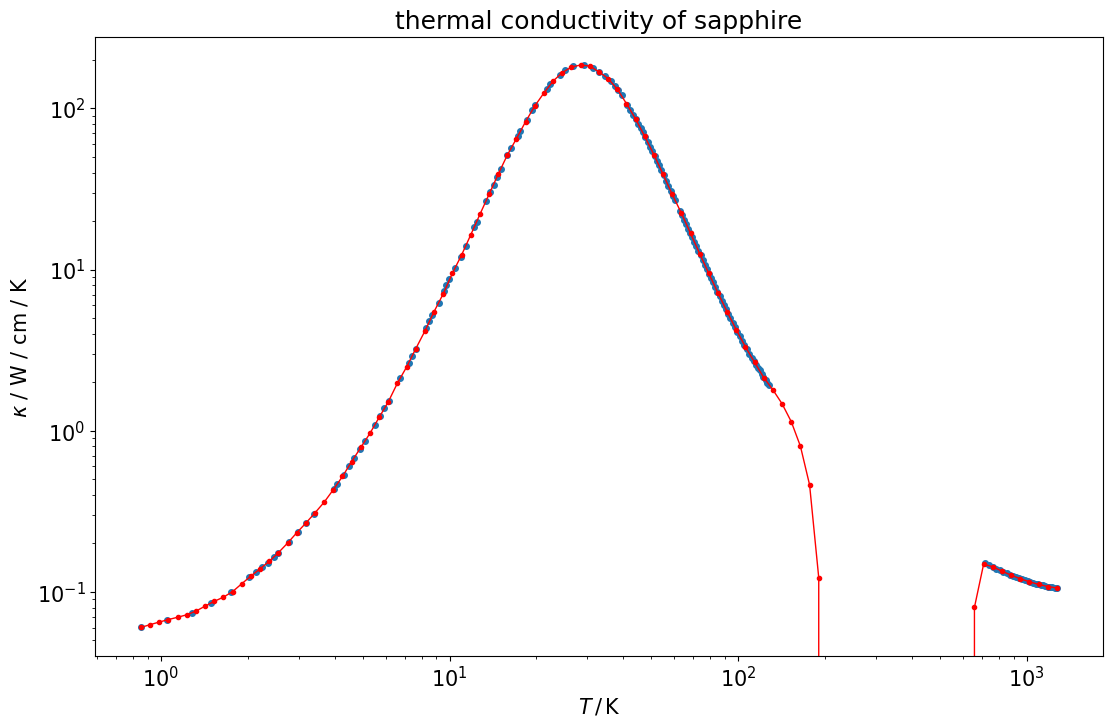

In [61]:
sz_h = 13
sz_v = sz_h / gr
fig = plt.figure(figsize = (sz_h, sz_v))

Tvals = 10 ** np.linspace(np.log10(KvT[0,0]), np.log10(KvT[-1,0]), 101)
Kvals = thermalK_Al2O3(Tvals)
plt.loglog(KvT[:,0], KvT[:,1], '.', ms = 8)
plt.loglog(Tvals, Kvals, 'r.-', lw = 1)
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)

plt.show()

Here add some points to bridge that gap:

In [62]:
newPoints = np.asarray([ [165, 1.09], [231, 0.585], [334, 0.343], [485, 0.217] ])
KvT = np.append(KvT0x, newPoints, 0)
KvT = np.append(KvT, KvT1x, 0)

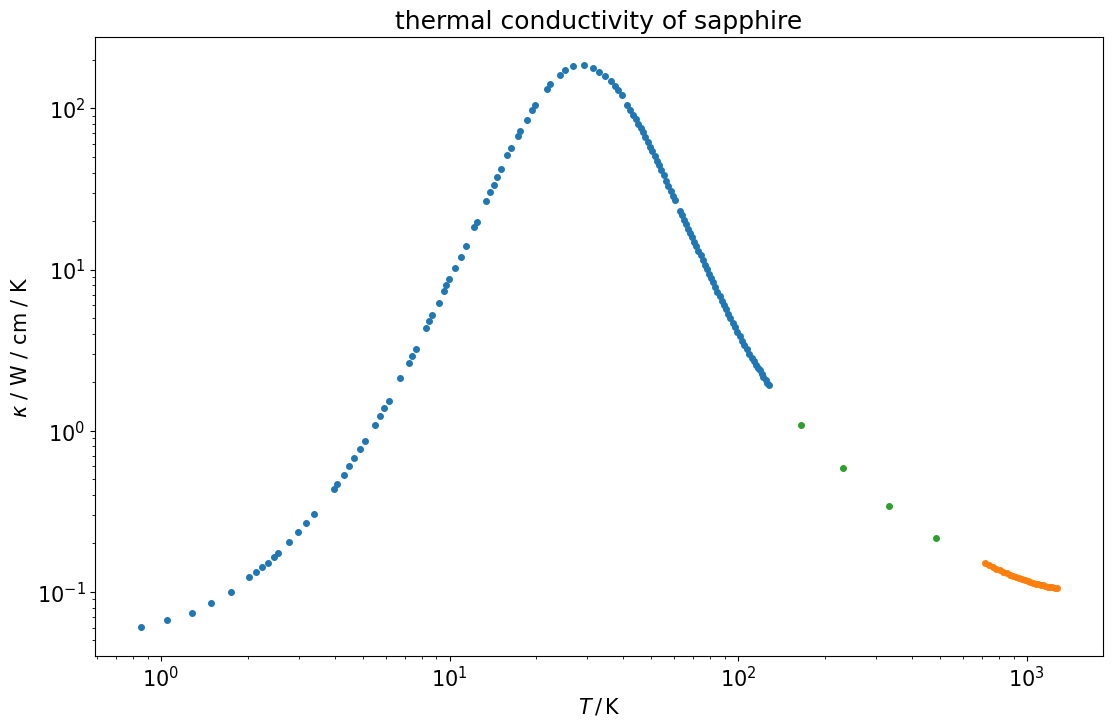

In [63]:
sz_h = 13
sz_v = sz_h / gr
fig = plt.figure(figsize = (sz_h, sz_v))

plt.loglog(KvT0x[:,0], KvT0x[:,1], '.', ms = 8)
plt.loglog(KvT1x[:,0], KvT1x[:,1], '.', ms = 8)
plt.loglog(newPoints[:,0], newPoints[:,1], '.', ms = 8)
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.show()

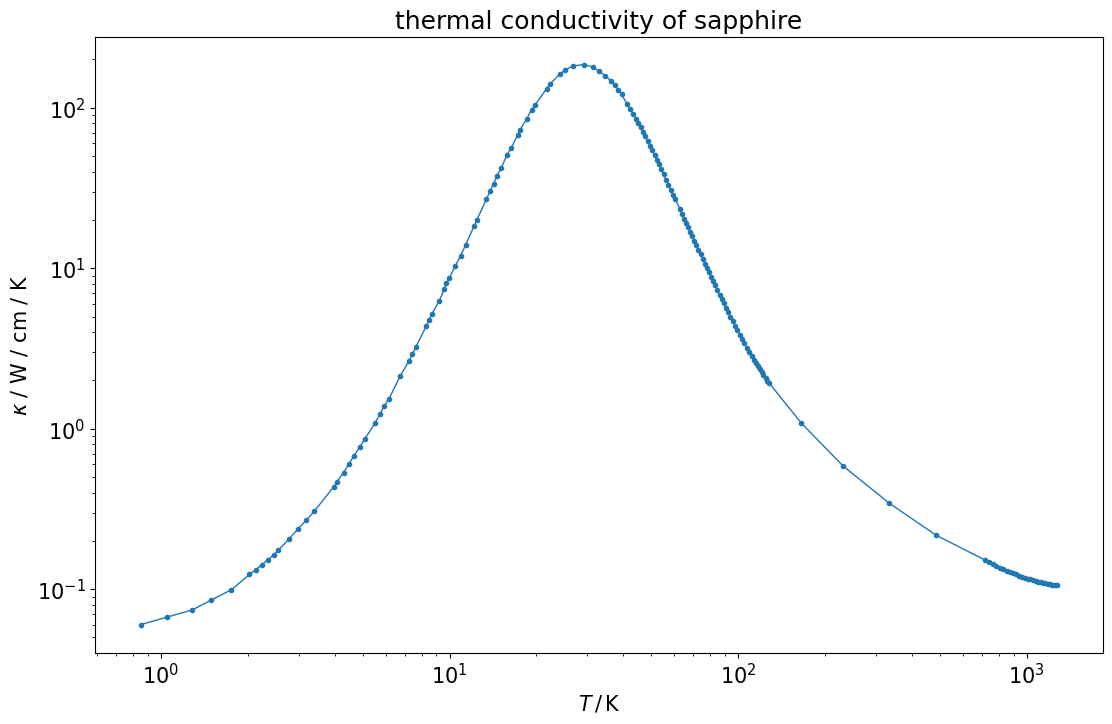

In [64]:
fig = plt.figure(figsize=(13,8))
plt.loglog(KvT[:,0], KvT[:,1], '.-', lw = 1)
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)
plt.show()

And attempt interpolation again:

In [65]:
thermalK_Al2O3 = scinterp.interp1d(KvT[:,0], KvT[:,1], 'quadratic')

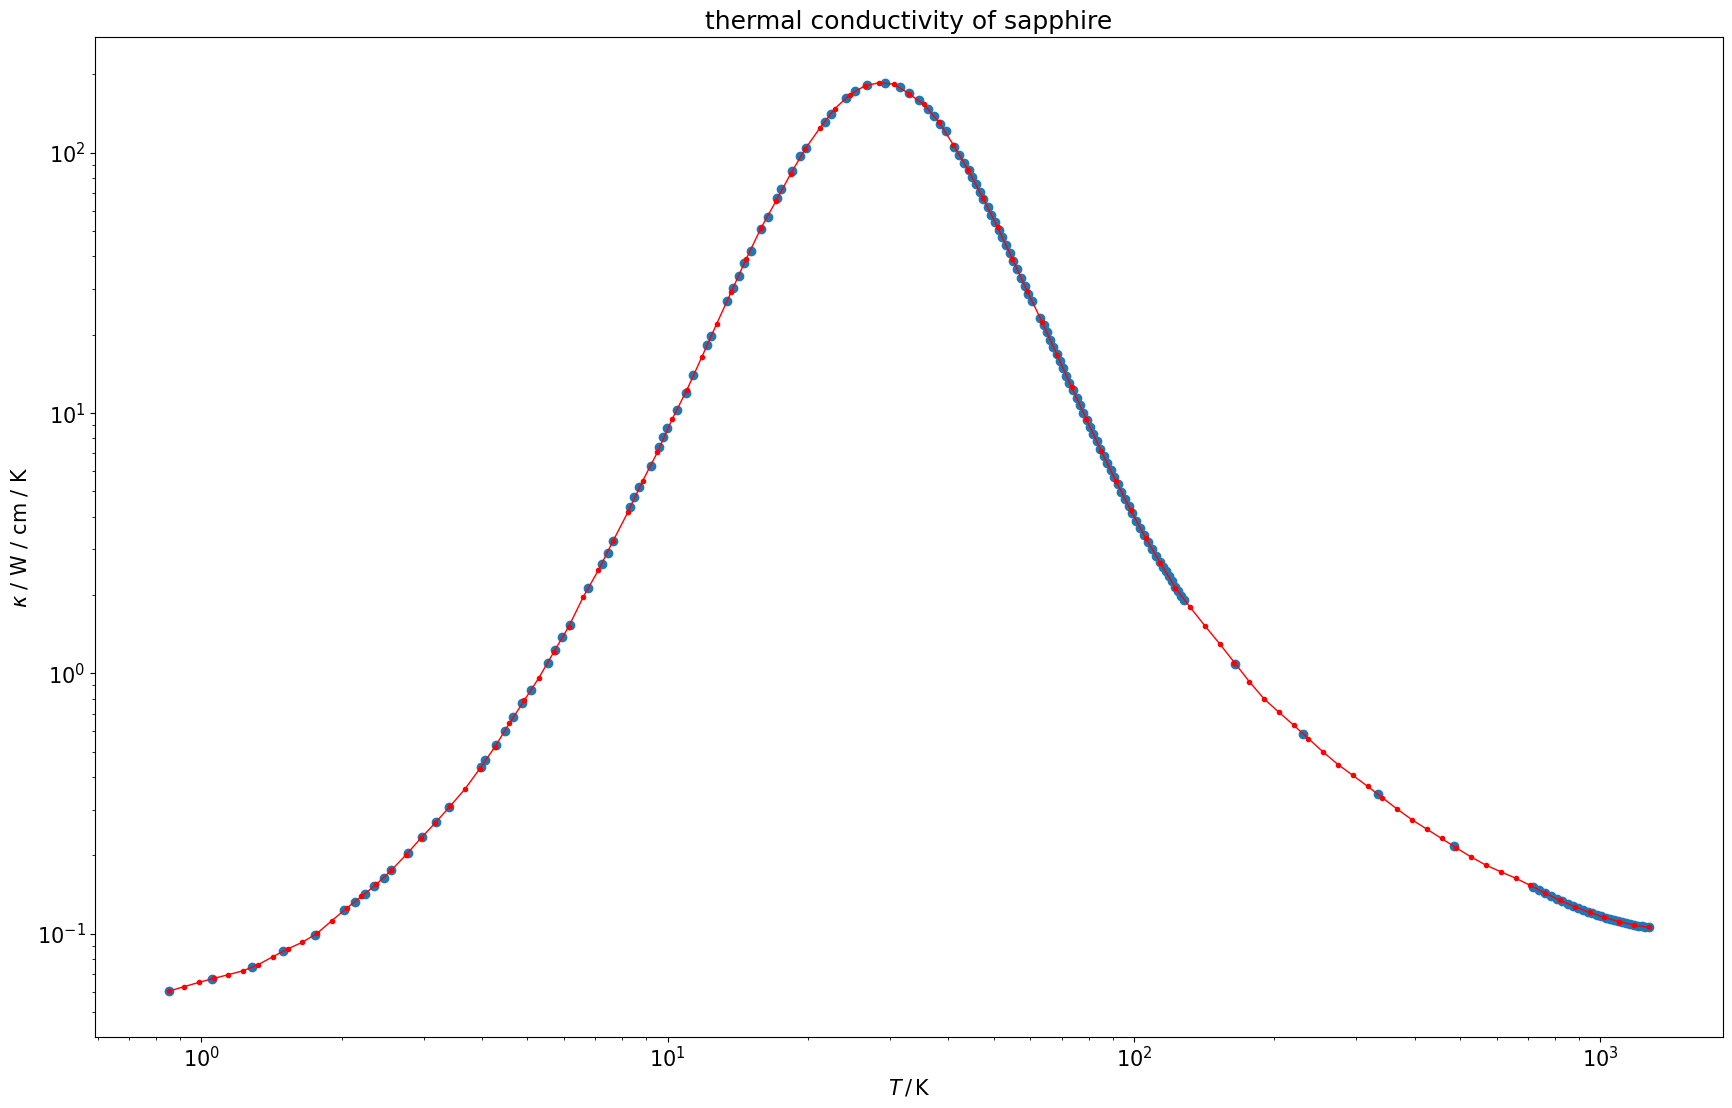

In [66]:
sz_h = 21
sz_v = sz_h / gr
fig = plt.figure(figsize = (sz_h, sz_v))

Tvals = 10 ** np.linspace(np.log10(KvT[0,0]), np.log10(KvT[-1,0]), 101)
Kvals = thermalK_Al2O3(Tvals)
plt.loglog(KvT[:,0], KvT[:,1], '.', ms = 12)
plt.loglog(Tvals, Kvals, 'r.-', lw = 1)
plt.title(title_K)
plt.xlabel(label_T)
plt.ylabel(label_K)

plt.show()

In [67]:
thermalK_Al2O3(300.)

array(0.39684682)

In [68]:
KvT[-1]

array([1.2709e+03, 1.0578e-01])

### Thermal diffusivity*

Thermal diffusivity is defined as the ratio of thermal conductivity to the product mass density and specific heat capacity: $\frac{\kappa}{\rho c_p}$

In [69]:
def thermal_diffusivity_Al2O3(T):
    return thermalK_Al2O3(T) / (mass_density_Al2O3 * c_p_Al2O3(T))

In [70]:
title_A = r'thermal diffusivity of sapphire v. temperature'
label_A = r'$\alpha \,/\, (\mathrm{cm^2 \,/\, s})$'

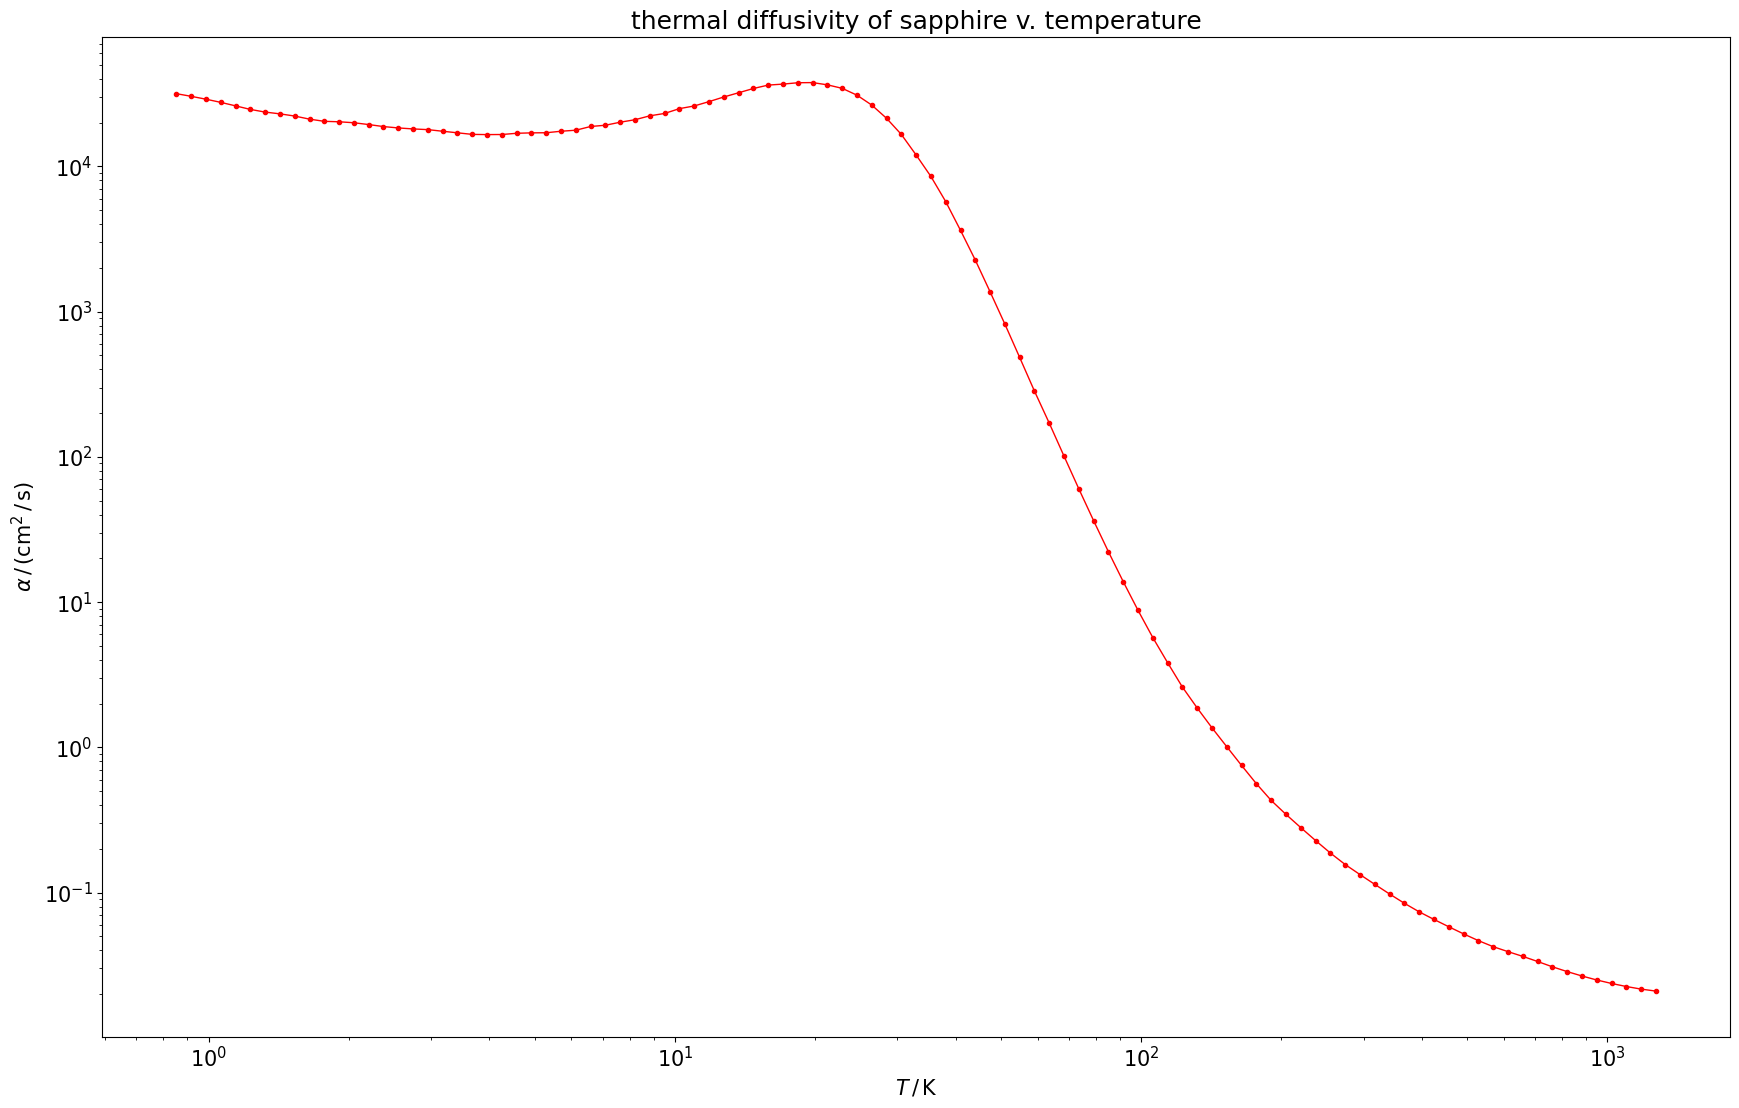

In [71]:
sz_h = 21
sz_v = sz_h / gr
fig = plt.figure(figsize = (sz_h, sz_v))

Tvals = 10 ** np.linspace(np.log10(KvT[0,0]), np.log10(KvT[-1,0]), 101)
Avals = thermal_diffusivity_Al2O3(Tvals)
plt.loglog(Tvals, Avals, 'r.-', lw = 1)
plt.title(title_A)
plt.xlabel(label_T)
plt.ylabel(label_A)

plt.show()

In [72]:
Tvals = 10 ** np.linspace(np.log10(KvT[0,0]), np.log10(KvT[-1,0]), 101)
Uvals = ue_v_T_Al2O3(Tvals)
Avals = thermal_diffusivity_Al2O3(Tvals)

alpha_v_T_Al2O3 = scinterp.interp1d(Tvals, Avals, 'quadratic')
alpha_v_T_Al2O3.__doc__ = 'Given temperature in K, return thermal difussivity of sapphire, Al2O3, in cm^2/s.'

alpha_v_U_Al2O3 = scinterp.interp1d(Uvals, Avals, 'quadratic')
alpha_v_U_Al2O3.__doc__ = 'Given internal energy density in J/gm, return thermal difussivity of sapphire, Al2O3, in cm^2/s.'

In [73]:
print(Tvals[0], Tvals[-1])
print(Uvals[0], Uvals[-1])

0.85264 1270.8999999999996
2.0557326338467762e-07 1200.7537082971596


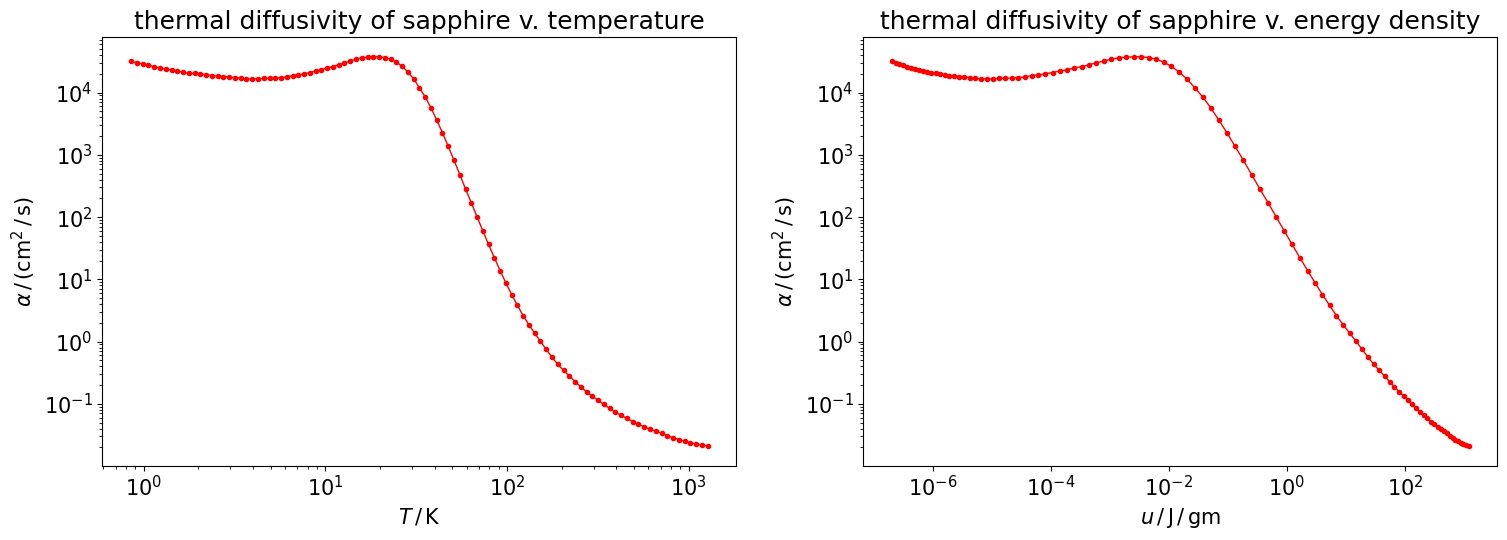

In [74]:
idx = 0
n_rows = 1
n_cols = 2
sz_h = 9
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

# α v. T
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
Tvals = 10 ** np.linspace(np.log10(KvT[0,0]), np.log10(KvT[-1,0]), 101)
Avals = thermal_diffusivity_Al2O3(Tvals)
plt.loglog(Tvals, Avals, 'r.-', lw = 1)
plt.title(title_A)
plt.xlabel(label_T)
plt.ylabel(label_A)

# α v. u
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
Uvals = ue_v_T_Al2O3(Tvals)
plt.loglog(Uvals, Avals, 'r.-', lw = 1)
plt.title('thermal diffusivity of sapphire v. energy density')
plt.xlabel(label_U)
plt.ylabel(label_A)

plt.show()

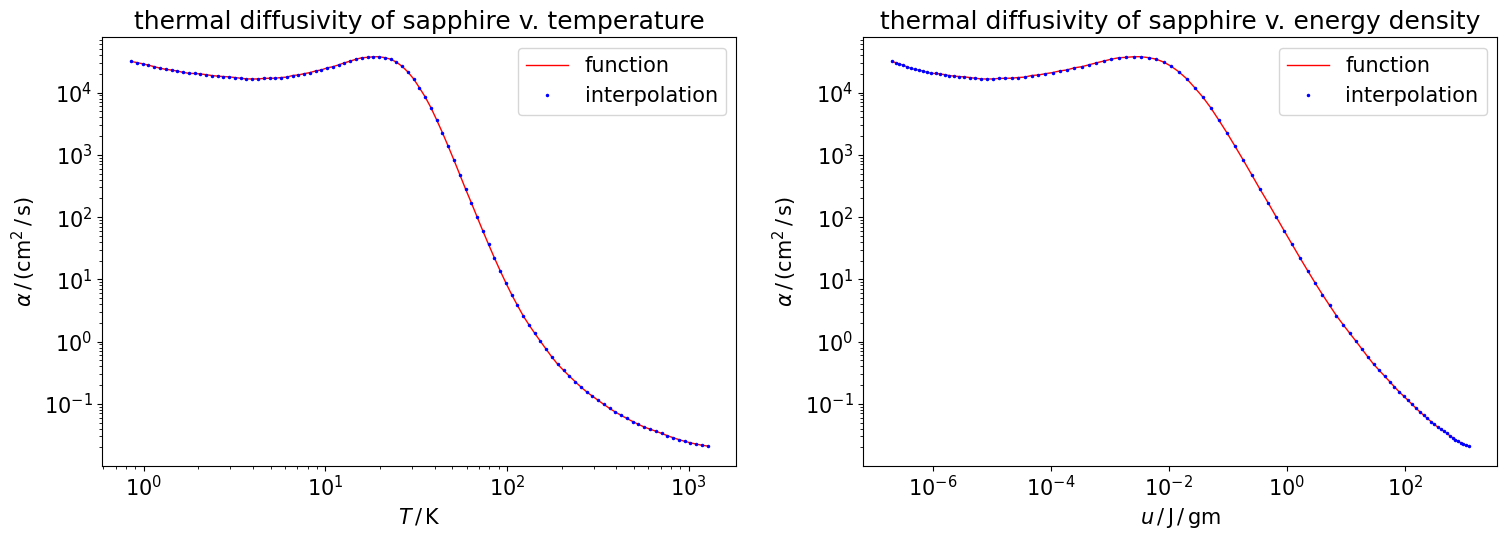

In [75]:
idx = 0
n_rows = 1
n_cols = 2
sz_h = 9
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

# α v. T
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
AIvals = alpha_v_T_Al2O3(Tvals)
plt.loglog(Tvals, Avals, 'r-', lw = 1, label = r'function')
plt.loglog(Tvals, AIvals, 'b.', ms = 3, label = r'interpolation')
plt.title(title_A)
plt.xlabel(label_T)
plt.ylabel(label_A)
plt.legend()

# α v. u
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
AIvals = alpha_v_U_Al2O3(Uvals)
plt.loglog(Uvals, Avals, 'r-', lw = 1, label = r'function')
plt.loglog(Uvals, AIvals, 'b.', ms = 3, label = r'interpolation')
plt.title('thermal diffusivity of sapphire v. energy density')
plt.xlabel(label_U)
plt.ylabel(label_A)
plt.legend()

plt.show()

### Save interpolated thermodynamic quantities*

In [76]:
with open('ue_v_T_Al2O3.pck', 'wb') as fh:
    pickle.dump(ue_v_T_Al2O3, fh)

In [77]:
with open('T_from_UvT_Al2O3.pck', 'wb') as fh:
    pickle.dump(T_from_UvT_Al2O3, fh)

In [78]:
with open('alpha_v_T_Al2O3.pck', 'wb') as fh:
    pickle.dump(alpha_v_T_Al2O3, fh)

In [79]:
with open('alpha_v_U_Al2O3.pck', 'wb') as fh:
    pickle.dump(alpha_v_U_Al2O3, fh)

### Read interpolated thermodynamic quantities

In [ ]:
with open('ue_v_T_Al2O3.pck', 'rb') as fh:
    ue_v_T_Al2O3 = pickle.load(fh)

In [ ]:
with open('T_from_UvT_Al2O3.pck', 'rb') as fh:
    T_from_UvT_Al2O3 = pickle.load(fh)

In [ ]:
with open('alpha_v_T_Al2O3.pck', 'rb') as fh:
    alpha_v_T_Al2O3 = pickle.load(fh)

In [ ]:
with open('alpha_v_U_Al2O3.pck', 'rb') as fh:
    alpha_v_U_Al2O3 = pickle.load(fh)

### Check interpolated thermodynamic quantities

In [80]:
title_AT = r'thermal diffusivity of sapphire v. temperature'
title_AU = r'thermal diffusivity of sapphire v. energy density'
label_A  = r'$\alpha \,/\, (\mathrm{cm^2 \,/\, s})$'
label_T  =    r'$T   \,/\,  \mathrm{K}$'
label_U  =    r'$u   \,/\,  \mathrm{ J \,/\, gm}$'

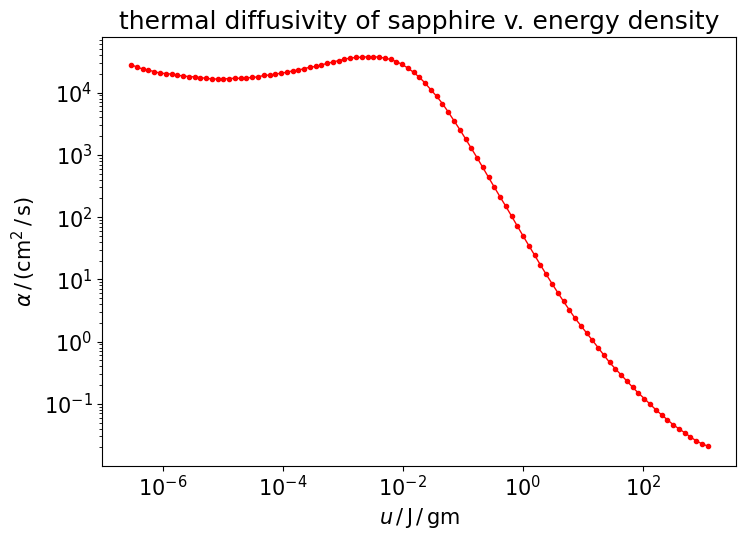

In [82]:
n_rows = 1
n_cols = 2
sz_h = 9
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

Uvals = 10 ** np.linspace(np.log10(0.3e-6), np.log10(1200), 101)
idx = 0

# α v. u
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
Avals = alpha_v_U_Al2O3(Uvals)
plt.loglog(Uvals, Avals, 'r.-', lw = 1)
plt.title(title_AU)
plt.xlabel(label_U)
plt.ylabel(label_A)

plt.show()

### Interpolate thermal diffusivity in the neighborhood of room temperature

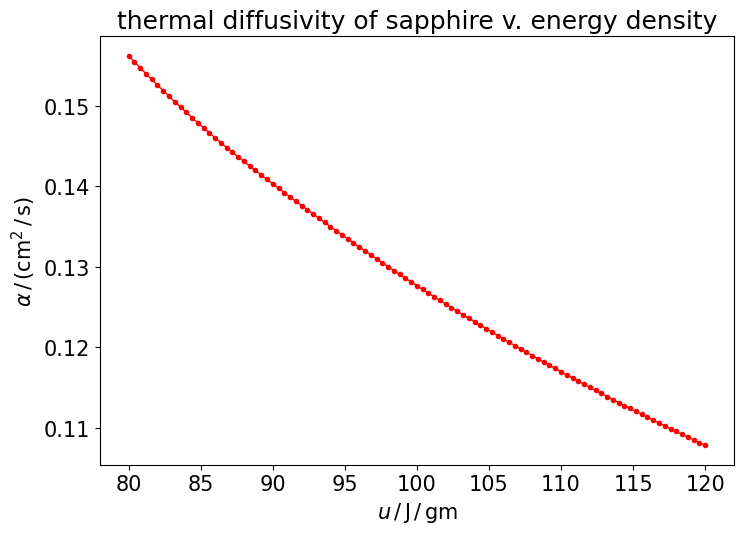

In [83]:
n_rows = 1
n_cols = 2
sz_h = 9
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

Uvals = np.linspace(80, 120, 101)
idx = 0

# α v. u
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
Avals = alpha_v_U_Al2O3(Uvals)
plt.plot(Uvals, Avals, 'r.-', lw = 1)
plt.title(title_AU)
plt.xlabel(label_U)
plt.ylabel(label_A)

plt.show()

Fit to a quadratic polynomial:

In [107]:
q_fit = np.polynomial.polynomial.Polynomial.fit(Uvals, Avals, 2)
q_fit

Polynomial([ 0.12762921, -0.02368266,  0.00421546], domain=[ 80., 120.], window=[-1.,  1.])

In [108]:
q_fit.coef

array([ 0.12762921, -0.02368266,  0.00421546])

In [110]:
q_fit(80.), q_fit(100.), q_fit(120.)

(0.15552733349459524, 0.1276292103139656, 0.10816201481337925)

In [109]:
print("{0:19.16f}, {1:19.16f}e-3, {2:19.16f}e-6".format(
    q_fit.coef[0], q_fit.coef[1] / 20 / si_m, q_fit.coef[2] / 20 ** 2 / si_u))

 0.1276292103139656, -1.1841329670303993e-3, 10.5386596000541193e-6


In [125]:
def α_sapphire_2(u):
    u0 = 100.
    α0 =  0.1276292103139656
    α1 = -1.1841329670303993e-3
    α2 = 10.5386596000541193e-6
    return α0 + (u - u0) * (α1 + α2 * (u - u0))

In [126]:
α_sapphire_2(80), α_sapphire_2(100), α_sapphire_2(120)

(0.15552733349459524, 0.1276292103139656, 0.10816201481337925)

Fit to a cubic polynomial:

In [117]:
q_fit = np.polynomial.polynomial.Polynomial.fit(Uvals, Avals, 3)
q_fit

Polynomial([ 0.12762921, -0.02302284,  0.00421546, -0.00107828], domain=[ 80., 120.], window=[-1.,  1.])

In [118]:
q_fit.coef

array([ 0.12762921, -0.02302284,  0.00421546, -0.00107828])

In [119]:
q_fit(80.), q_fit(100.), q_fit(120.)

(0.1559457906193673, 0.12762921031396554, 0.10774355768860723)

In [120]:
print("{0:19.16f}, {1:19.16f}e-3, {2:19.16f}e-6, {3:19.16f}e-9".format(
    q_fit.coef[0], q_fit.coef[1] / 20 / si_m, q_fit.coef[2] / 20 ** 2 / si_u, q_fit.coef[3] / 20 ** 3 / si_n))

 0.1276292103139655, -1.1511420522975251e-3, 10.5386596000543094e-6, -134.7844274286904067e-9


In [127]:
def α_sapphire_3(u):
    u0 = 100.
    α0 =    0.1276292103139655
    α1 =   -1.1511420522975251e-3
    α2 =   10.5386596000543094e-6
    α3 = -134.7844274286904067e-9
    return α0 + (u - u0) * (α1 + (u - u0) * (α2 + (u - u0) * α3))

In [128]:
α_sapphire_3(80), α_sapphire_3(100), α_sapphire_3(120)

(0.15594579061936725, 0.1276292103139655, 0.10774355768860722)

### Interpolate thermal diffusivity in the neighborhood of 0°C

In [129]:
# cylindrical surface boundary condition: U(0°C)
T_0C = 273.15  # 0°C in Kelvin
Ue0 = ue_v_T_Al2O3(T_0C)
Ue0

array(79.57850202)

Try fitting data near 0°C to α(u) = a_0 + a1 / u:

In [130]:
(ue_v_T_Al2O3([200, 350]),
 ue_v_T_Al2O3([225, 325]))

(array([ 34.5209097 , 141.05065558]), array([ 48.1094293 , 119.79406592]))

In [137]:
uj = np.linspace(45,120,16)
fj = alpha_v_U_Al2O3(uj)
print(np.asarray([uj, fj]).T)

[[4.50000000e+01 2.81440697e-01]
 [5.00000000e+01 2.52386947e-01]
 [5.50000000e+01 2.28713222e-01]
 [6.00000000e+01 2.08808583e-01]
 [6.50000000e+01 1.92226874e-01]
 [7.00000000e+01 1.78081667e-01]
 [7.50000000e+01 1.66302854e-01]
 [8.00000000e+01 1.56210801e-01]
 [8.50000000e+01 1.47578062e-01]
 [9.00000000e+01 1.40321276e-01]
 [9.50000000e+01 1.33738509e-01]
 [1.00000000e+02 1.27671146e-01]
 [1.05000000e+02 1.22118346e-01]
 [1.10000000e+02 1.16993684e-01]
 [1.15000000e+02 1.12239415e-01]
 [1.20000000e+02 1.07855539e-01]]


In [142]:
uj = np.linspace(40,120,9)
fj = alpha_v_U_Al2O3(uj)
print(np.asarray([uj, fj]).T)

[[4.00000000e+01 3.17342626e-01]
 [5.00000000e+01 2.52386947e-01]
 [6.00000000e+01 2.08808583e-01]
 [7.00000000e+01 1.78081667e-01]
 [8.00000000e+01 1.56210801e-01]
 [9.00000000e+01 1.40321276e-01]
 [1.00000000e+02 1.27671146e-01]
 [1.10000000e+02 1.16993684e-01]
 [1.20000000e+02 1.07855539e-01]]


In [143]:
n  = len(fj)
F  = np.sum(fj)
F_ = np.sum(fj / uj)
G  = np.sum(1 / uj)
H  = np.sum(1 / uj**2)

n, F, F_, G, H

(9,
 1.605672267929528,
 0.025756318306759108,
 0.12698773448773448,
 0.002038655273097914)

In [144]:
 print("[a_0, a_1] =", 1 / (n * H - G ** 2) * np.matmul( np.array([[ H, -G], [-G, n]]), np.array([F, F_]) ))

[a_0, a_1] = [1.20418992e-03 1.25589654e+01]


Also try fitting data near 0°C to a fith-order polynomial: $\alpha(u) = \sum_{j=0}^5 c_j u^j$:

In [145]:
alpha_of_u = np.poly1d(np.polyfit(uj, fj, 5))
print(alpha_of_u)
alpha_of_u

            5            4             3             2
-4.172e-11 x + 2.17e-08 x - 4.684e-06 x + 0.0005317 x - 0.03288 x + 1.03


poly1d([-4.17171078e-11,  2.16963114e-08, -4.68417304e-06,  5.31731301e-04,
       -3.28849349e-02,  1.03044499e+00])

In [146]:
def α_Al2O3(u):
    return ((((-4.17171078e-11 * u + 2.16963114e-08) * u - 4.68417304e-06) * u + 5.31731301e-04) * u - 3.28849349e-02) * u + 1.03044499e+00

In [147]:
title_AT = r'thermal diffusivity of sapphire v. temperature'
title_AU = r'thermal diffusivity of sapphire v. energy density'
label_A  = r'$\alpha \,/\, (\mathrm{cm^2 \,/\, s})$'
label_T  =    r'$T   \,/\,  \mathrm{K}$'
label_U  =    r'$u   \,/\,  \mathrm{ J \,/\, gm}$'

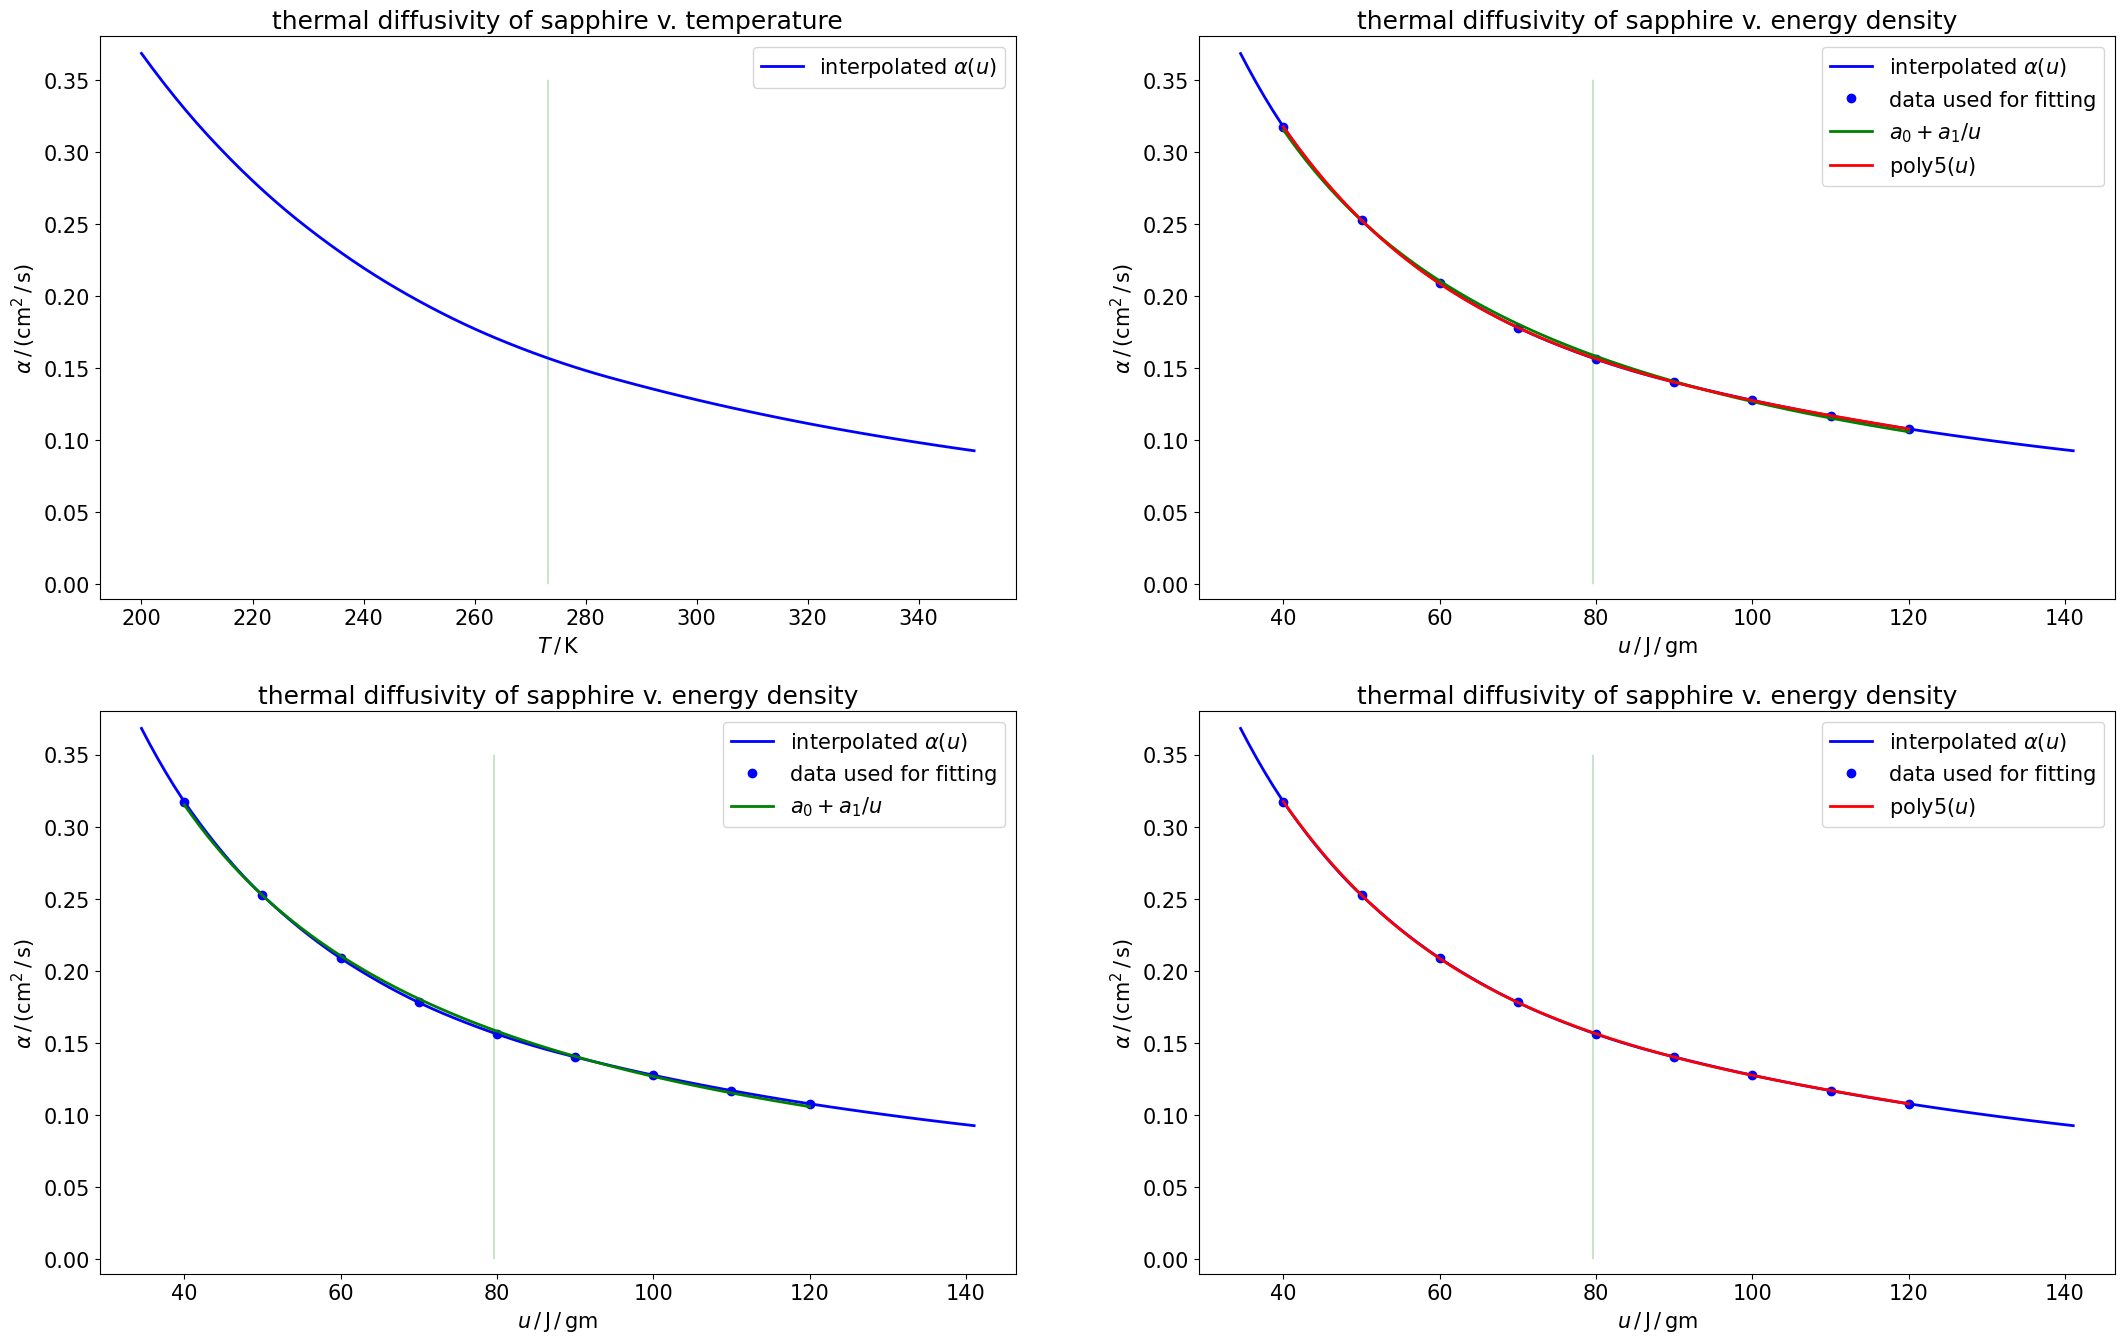

In [150]:
idx = 0
n_rows = 2
n_cols = 2
sz_h = 13
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

Tvals = np.linspace(200, 350, 76)
Uvals = ue_v_T_Al2O3(Tvals)
UvalsX = np.linspace(40, 120, 81)
# FvalsI = 9.06906377e-03 + 11.8378854 / UvalsX
FvalsI = 1.20418992e-03 + 12.5589654 / UvalsX
Fvals5 = α_Al2O3(UvalsX)

# α v. T
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
Avals = alpha_v_T_Al2O3(Tvals)
plt.plot(Tvals, Avals, 'b-', lw = 2, ms = 6, label = r'interpolated $\alpha(u)$')
plt.title(title_AT)
plt.xlabel(label_T)
plt.ylabel(label_A)
plt.ylim(-0.01, 0.38)
vline(273.15, [0.00, 0.35], 'g-', wd = 0.3)
plt.legend()

# α v. u
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
Avals = alpha_v_U_Al2O3(Uvals)
plt.plot(Uvals, Avals, 'b-', lw = 2, label = r'interpolated $\alpha(u)$')
plt.plot(uj, fj, 'b.', ms = 12, label = r'data used for fitting')
plt.plot(UvalsX, FvalsI, 'g-', lw = 2, label = r'$a_0 + a_1 / u$')
plt.plot(UvalsX, Fvals5, 'r-', lw = 2, label = r'poly5$(u)$')
plt.title(title_AU)
plt.xlabel(label_U)
plt.ylabel(label_A)
plt.ylim(-0.01, 0.38)
vline(ue_v_T_Al2O3(273.15), [0.00, 0.35], 'g-', wd = 0.3)
plt.legend()

# α v. u
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
Avals = alpha_v_U_Al2O3(Uvals)
plt.plot(Uvals, Avals, 'b-', lw = 2, label = r'interpolated $\alpha(u)$')
plt.plot(uj, fj, 'b.', ms = 12, label = r'data used for fitting')
plt.plot(UvalsX, FvalsI, 'g-', lw = 2, label = r'$a_0 + a_1 / u$')
# plt.plot(UvalsX, Fvals5, 'r-', lw = 2, label = r'poly5$(u)$')
plt.title(title_AU)
plt.xlabel(label_U)
plt.ylabel(label_A)
plt.ylim(-0.01, 0.38)
vline(ue_v_T_Al2O3(273.15), [0.00, 0.35], 'g-', wd = 0.3)
plt.legend()

# α v. u
idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
Avals = alpha_v_U_Al2O3(Uvals)
plt.plot(Uvals, Avals, 'b-', lw = 2, label = r'interpolated $\alpha(u)$')
plt.plot(uj, fj, 'b.', ms = 12, label = r'data used for fitting')
# plt.plot(UvalsX, FvalsI, 'g-', lw = 2, label = r'$a_0 + a_1 / u$')
plt.plot(UvalsX, Fvals5, 'r-', lw = 2, label = r'poly5$(u)$')
plt.title(title_AU)
plt.xlabel(label_U)
plt.ylabel(label_A)
plt.ylim(-0.01, 0.38)
vline(ue_v_T_Al2O3(273.15), [0.00, 0.35], 'g-', wd = 0.3)
plt.legend()

plt.show()

### Optical properties

---
---
## ***Simulate sapphire crystal with temperature-dependent thermal diffusivity***

## Realistic nonlinear Poisson equation in a three dimensional cylinder with realistic thermal diffusivity

We are here solving for thermal saturation—*i.e.* thermal equilibrium—so this section does not include the time-dependent approach to saturation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects
import numpy as np
import time as tm
import copy
import os

In [2]:
# Warning: from fenics import * will import both ‘sym‘ and
# ‘q‘ from FEniCS. We therefore import FEniCS first and then
# overwrite these objects.
from fenics import *

In [3]:
from mshr import *   # now deprecated (?), transition to alternate mesh generator (?)

Define some mathematical constants:

In [4]:
# pi
π = np.pi

# golden ratio
gr = (1 + np.sqrt(5)) / 2

# roots
rt2 = np.sqrt(2.)

# degree to radian, and radian to degree
degree = π / 180.
d2r = degree
r2d = 1 / degree

Define the SI prefixes, which are particularly useful in converting data for plots:

In [5]:
# SI prefixes
si_Y  = 1.e24  # yotta
si_Z  = 1.e21  # zetta
si_E  = 1.e18  # exa
si_P  = 1.e15  # peta
si_T  = 1.e12  # tera
si_G  = 1.e9   # giga
si_M  = 1.e6   # mega
si_k  = 1.e3   # kilo
si_h  = 1.e2   # hecto
si_da = 1.e1   # deka
si_d  = 1.e-1  # deci
si_c  = 1.e-2  # centi
si_m  = 1.e-3  # milli
si_u  = 1.e-6  # micro
si_n  = 1.e-9  # nano
si_p  = 1.e-12 # pico
si_f  = 1.e-15 # femto
si_a  = 1.e-18 # atto
si_z  = 1.e-21 # zepto
si_y  = 1.e-24 # yocto

In [6]:
def α_Al2O3(u):
    return ((((-4.17171078e-11 * u + 2.16963114e-08) * u - 4.68417304e-06) * u + 5.31731301e-04) * u - 3.28849349e-02) * u + 1.03044499e+00

In [7]:
# geometry dimensions
leng = 2.5  # cylinder length [cm]
diam = 1.0  # cylinder diameter [cm]

# derived parameters
rad = diam / 2    # radius [cm]
lh = leng / 2     # half-length [cm]
rad2 = rad * rad  # radius squared [cm^2]
z_en = 0.e0
z_so = leng

# create a cylindrical geometry
# cylinder = Cylinder('coordinate of center of the top circle', 'coordinate of center of the bottom circle', 'radius of the circle at the top', 'radius of the circle at the bottom')
cylinder = Cylinder(Point(0, 0, z_en), Point(0, 0, z_so), rad, rad)

# define mesh
geometry = cylinder
mden = 25  # mesh density
mesh = generate_mesh(geometry, mden)

Generating mesh with CGAL 3D mesh generator


In [8]:
# plot mesh
print('Geometry')
print('length: %s cm, radius: %s cm' %(leng, rad))
print('Mesh')
print('mesh density: %s, no. of tetrahedral elements: %s, no. of vertices: %s' %(mden, mesh.num_cells(), mesh.num_vertices()))
mesh

Geometry
length: 2.5 cm, radius: 0.5 cm
Mesh
mesh density: 25, no. of tetrahedral elements: 7088, no. of vertices: 1487


In [9]:
# constants
#  u_0c = 79.57850202 J/gm
# u_20C = 94.40721049 J/gm
U0 = 100.0    # J / gm internal energy density
U20 = 94.4072    # J / gm internal energy density
# wdT = 0.055   # laser radius [cm] - BELLA pump laser radius (1.1 mm diameter)
mass_density_Al2O3 = 3.98 # / (gm / cm^3)

# define function space on mesh
V = FunctionSpace(mesh, 'P', 1)

# define Dirichlet boundary condition for sides at r_max
tol = 1.e-13
bc_tol = 2 * rad * (rad / 40)  # 2 * rad * Δr
def boundary_D(x, on_boundary):
    return on_boundary and near(x[0]*x[0] + x[1]*x[1], rad2, bc_tol)
bc = DirichletBC(V, Constant(U20), boundary_D)

# Gaussian (BELLA pump laser)
pix_to_deg = 6.9               # pix to micron ratio 1 pixel/6.9 micron  (formerly 1 pixel/6.9 micron)
# a1 = 3.84e4                    # Gaussian amplitude
b1 = 0.0   # 361.5
c1 = 166.0 * pix_to_deg / 1e4  # E-field std dev. / cm
c1 *= 1.0
print('Radial std. dev., c1: %f [cm]' %(c1))

alpha_h = 1.2  # absorption coefficient [1 / cm]

# calculate incremental energy deposition
PumpPower = 20                                                      # pump laser power [W]
P_abs = PumpPower * (800 - 532) / 800                               # absorbed power [W]  (previously used 35 * 2 in top hat heat load)
print('Absorbed power:       %f [W]' %(P_abs))
V_eff = np.pi * c1**2 * (1 - np.exp(-alpha_h * leng)) / alpha_h     # effective volume [cm^3]
dQ_incr = P_abs / V_eff        # energy deposition rate per unit volume [W/cm^3]
dU_incr = dQ_incr / mass_density_Al2O3  # energy deposition rate per unit mass / (W/gm)

print('M_crys:  %f (gm)' %(π * rad2 * leng * mass_density_Al2O3))
print('V_crys:  %f (cm^3)' %(π * rad2 * leng))
print('V_eff:   %f (cm^3)' %(V_eff))
print('dQ_incr: %f (W/cm^3)' %(dQ_incr))
print('dU_incr: %f (W/gm)' %(dU_incr))

Radial std. dev., c1: 0.114540 [cm]
Absorbed power:       6.700000 [W]
M_crys:  7.814712 (gm)
V_crys:  1.963495 (cm^3)
V_eff:   0.032637 (cm^3)
dQ_incr: 205.291459 (W/cm^3)
dU_incr: 51.580769 (W/gm)


In [10]:
# define heat load expressions
gsn_bella_heat_load = Expression('dU * exp( -( pow((x[0] - b1) / c1, 2) + pow((x[1] - b1) / c1, 2) ) ) * exp(- alpha_h * (x[2] - zi))',
                                 degree = 1, dU = dU_incr, b1 = b1, c1 = c1, alpha_h = alpha_h, zi = z_en)

# define initial value
u_n = interpolate(Constant(U20), V)

# tol = 1e-2  # originally set to 1e-2 by Dan
tol = 2e-2
u_max = u_n(0., 0., z_en)
u_ctr = u_n(0., 0., lh)
u_min = u_n(rad-tol, 0., z_so)
u_min, u_ctr, u_max

(94.4072, 94.40720000000002, 94.4072)

In [11]:
V = FunctionSpace(mesh, 'P', 1)
bc = DirichletBC(V, Constant(U20), boundary_D)
u = Function(V)
v = TestFunction(V)
g = gsn_bella_heat_load
F = α_Al2O3(u)*dot(grad(u), grad(v))*dx - g*v*dx

In [12]:
solve(F == 0, u, bc)

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 2.559e+04 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.379e-01 (tol = 1.000e-10) r (rel) = 5.388e-06 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 1.945e-03 (tol = 1.000e-10) r (rel) = 7.603e-08 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 3.058e-07 (tol = 1.000e-10) r (rel) = 1.195e-11 (tol = 1.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.


In [17]:
xmax = rad
ymax = rad
xv = np.linspace(-xmax, xmax, 60)
yv = np.linspace(-ymax, ymax, 60)
zv = np.linspace(z_en, z_so, 30)

In [14]:
def u_in_cyl(r, x, y, z, out = np.nan):
    if x ** 2 + y ** 2 < r ** 2:
        val = u(x, y, z)
    else:
        val = out
    return val

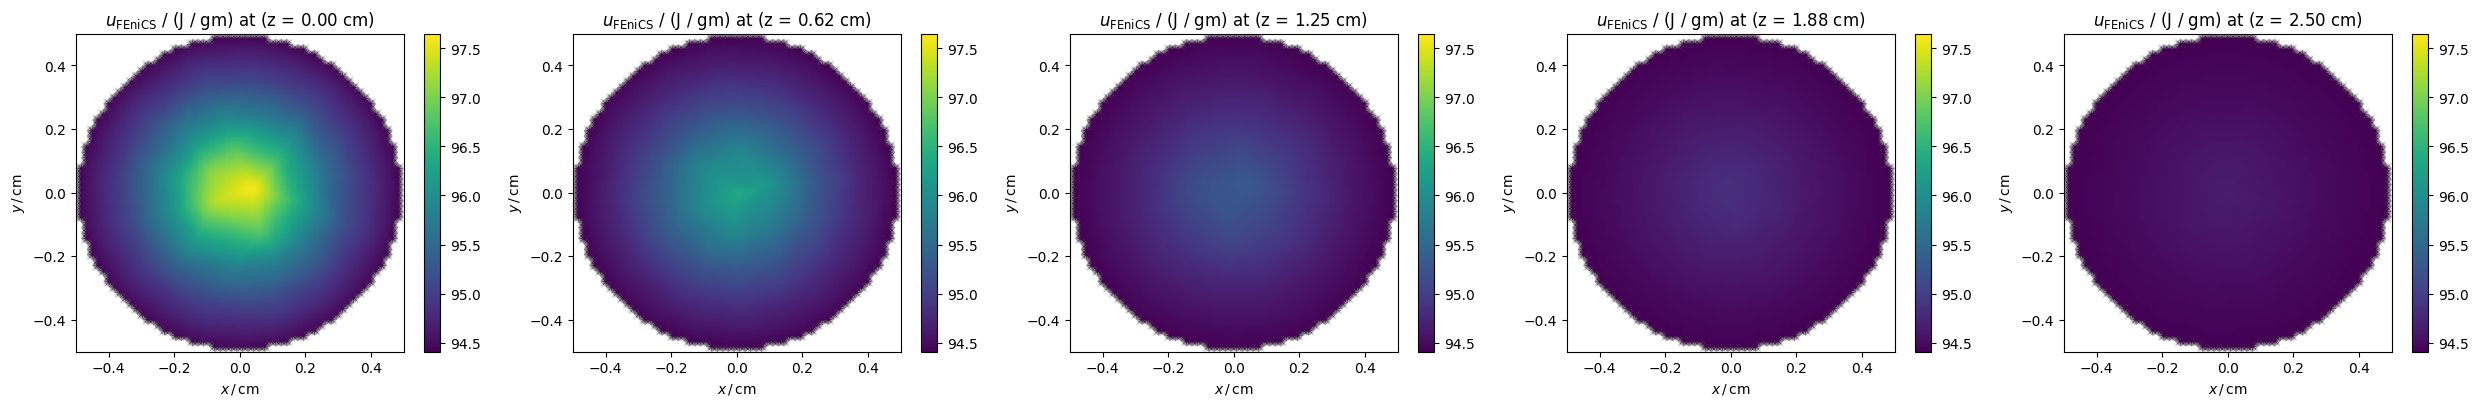

In [16]:
idx = 0
n_rows = 1
n_cols = 5
sz_h = 5
sz_v = sz_h / 1.2
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))
shading = 'gouraud'
# shading = 'nearest'

for zc in np.linspace(0, leng, 5):
    u_fenics = np.asarray([ [ u_in_cyl(rad * (1. - 2.e-2), x, y, zc) for x in xv] for y in yv])

    idx += 1
    ax = plt.subplot(n_rows, n_cols, idx)
    # ax.set_aspect(1.0)
    pcm = ax.pcolormesh(xv, yv, u_fenics, cmap = plt.cm.viridis, shading = shading, vmin = U20, vmax = 97.65)
    plt.colorbar(pcm)
    plt.title(r'$u_\mathrm{FEniCS}$ / (J / gm) at ' + '(z = {0:4.2f} cm)'.format(zc))
    plt.xlabel(r'$x \,/\, \mathrm{cm}$')
    plt.ylabel(r'$y \,/\, \mathrm{cm}$')

plt.tight_layout()
plt.show()

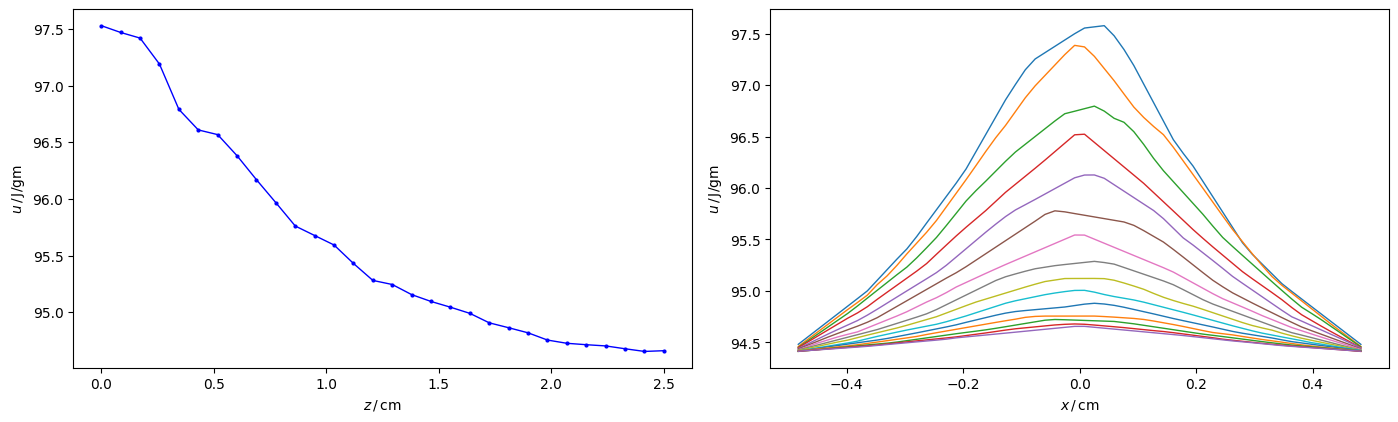

In [30]:
idx = 0
n_rows = 1
n_cols = 5
sz_h = 7
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.set_aspect(0.618)
u_fenics = np.asarray([ u_in_cyl(rad * (1. - 2.e-2), 0., 0., z) for z in zv])
plt.plot(zv, u_fenics, 'b.-', lw = 1, ms = 4)
plt.xlabel(r'$z \,/\, \mathrm{cm}$')
plt.ylabel(r'$u \,/\, \mathrm{J/gm}$')

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.set_aspect(0.418)
for z in np.linspace(z_en, z_so, 15):
    u_fenics = np.asarray([ u_in_cyl(rad * (1. - 2.e-2), x, 0., z) for x in xv])
    plt.plot(xv, u_fenics, '-', lw = 1, ms = 4)
plt.xlabel(r'$x \,/\, \mathrm{cm}$')
plt.ylabel(r'$u \,/\, \mathrm{J/gm}$')

plt.tight_layout()
plt.show()

## Realistic nonlinear Poisson equation in a three dimensional cylinder with constant thermal diffusivity

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects
import numpy as np
import time as tm
import copy
import os

In [2]:
# Warning: from fenics import * will import both ‘sym‘ and
# ‘q‘ from FEniCS. We therefore import FEniCS first and then
# overwrite these objects.
from fenics import *

In [3]:
from mshr import *   # now deprecated (?), transition to alternate mesh generator (?)

Define some mathematical constants:

In [4]:
# pi
π = np.pi

# golden ratio
gr = (1 + np.sqrt(5)) / 2

# roots
rt2 = np.sqrt(2.)

# degree to radian, and radian to degree
degree = π / 180.
d2r = degree
r2d = 1 / degree

Define the SI prefixes, which are particularly useful in converting data for plots:

In [5]:
# SI prefixes
si_Y  = 1.e24  # yotta
si_Z  = 1.e21  # zetta
si_E  = 1.e18  # exa
si_P  = 1.e15  # peta
si_T  = 1.e12  # tera
si_G  = 1.e9   # giga
si_M  = 1.e6   # mega
si_k  = 1.e3   # kilo
si_h  = 1.e2   # hecto
si_da = 1.e1   # deka
si_d  = 1.e-1  # deci
si_c  = 1.e-2  # centi
si_m  = 1.e-3  # milli
si_u  = 1.e-6  # micro
si_n  = 1.e-9  # nano
si_p  = 1.e-12 # pico
si_f  = 1.e-15 # femto
si_a  = 1.e-18 # atto
si_z  = 1.e-21 # zepto
si_y  = 1.e-24 # yocto

In [6]:
def α_Al2O3(u):
    return 0.1343

In [7]:
# geometry dimensions
leng = 2.5  # cylinder length [cm]
diam = 1.0  # cylinder diameter [cm]

# derived parameters
rad = diam / 2    # radius [cm]
lh = leng / 2     # half-length [cm]
rad2 = rad * rad  # radius squared [cm^2]
z_en = 0.e0
z_so = leng

# create a cylindrical geometry
# cylinder = Cylinder('coordinate of center of the top circle', 'coordinate of center of the bottom circle', 'radius of the circle at the top', 'radius of the circle at the bottom')
cylinder = Cylinder(Point(0, 0, z_en), Point(0, 0, z_so), rad, rad)

# define mesh
geometry = cylinder
mden = 25  # mesh density
mesh = generate_mesh(geometry, mden)

Generating mesh with CGAL 3D mesh generator


In [8]:
# plot mesh
print('Geometry')
print('length: %s cm, radius: %s cm' %(leng, rad))
print('Mesh')
print('mesh density: %s, no. of tetrahedral elements: %s, no. of vertices: %s' %(mden, mesh.num_cells(), mesh.num_vertices()))
mesh

Geometry
length: 2.5 cm, radius: 0.5 cm
Mesh
mesh density: 25, no. of tetrahedral elements: 7088, no. of vertices: 1487


In [9]:
# constants
#  u_0c = 79.57850202 J/gm
# u_20C = 94.40721049 J/gm
U0 = 100.0    # J / gm internal energy density
U20 = 94.4072    # J / gm internal energy density
# wdT = 0.055   # laser radius [cm] - BELLA pump laser radius (1.1 mm diameter)
mass_density_Al2O3 = 3.98 # / (gm / cm^3)

# define function space on mesh
V = FunctionSpace(mesh, 'P', 1)

# define Dirichlet boundary condition for sides at r_max
tol = 1.e-13
bc_tol = 2 * rad * (rad / 40)  # 2 * rad * Δr
def boundary_D(x, on_boundary):
    return on_boundary and near(x[0]*x[0] + x[1]*x[1], rad2, bc_tol)
bc = DirichletBC(V, Constant(U20), boundary_D)

# Gaussian (BELLA pump laser)
pix_to_deg = 6.9               # pix to micron ratio 1 pixel/6.9 micron  (formerly 1 pixel/6.9 micron)
# a1 = 3.84e4                    # Gaussian amplitude
b1 = 0.0   # 361.5
c1 = 166.0 * pix_to_deg / 1e4  # E-field std dev. / cm
c1 *= 1.0
print('Radial std. dev., c1: %f [cm]' %(c1))

alpha_h = 1.2  # absorption coefficient [1 / cm]

# calculate incremental energy deposition
PumpPower = 20                                                      # pump laser power [W]
P_abs = PumpPower * (800 - 532) / 800                               # absorbed power [W]  (previously used 35 * 2 in top hat heat load)
print('Absorbed power:       %f [W]' %(P_abs))
V_eff = np.pi * c1**2 * (1 - np.exp(-alpha_h * leng)) / alpha_h     # effective volume [cm^3]
dQ_incr = P_abs / V_eff        # energy deposition rate per unit volume [W/cm^3]
dU_incr = dQ_incr / mass_density_Al2O3  # energy deposition rate per unit mass / (W/gm)

print('M_crys:  %f (gm)' %(π * rad2 * leng * mass_density_Al2O3))
print('V_crys:  %f (cm^3)' %(π * rad2 * leng))
print('V_eff:   %f (cm^3)' %(V_eff))
print('dQ_incr: %f (W/cm^3)' %(dQ_incr))
print('dU_incr: %f (W/gm)' %(dU_incr))

Radial std. dev., c1: 0.114540 [cm]
Absorbed power:       6.700000 [W]
M_crys:  7.814712 (gm)
V_crys:  1.963495 (cm^3)
V_eff:   0.032637 (cm^3)
dQ_incr: 205.291459 (W/cm^3)
dU_incr: 51.580769 (W/gm)


In [10]:
# define heat load expressions
gsn_bella_heat_load = Expression('dU * exp( -( pow((x[0] - b1) / c1, 2) + pow((x[1] - b1) / c1, 2) ) ) * exp(- alpha_h * (x[2] - zi))',
                                 degree = 1, dU = dU_incr, b1 = b1, c1 = c1, alpha_h = alpha_h, zi = z_en)

# define initial value
u_n = interpolate(Constant(U20), V)

# tol = 1e-2  # originally set to 1e-2 by Dan
tol = 2e-2
u_max = u_n(0., 0., z_en)
u_ctr = u_n(0., 0., lh)
u_min = u_n(rad-tol, 0., z_so)
u_min, u_ctr, u_max

(94.4072, 94.40720000000002, 94.4072)

In [11]:
V = FunctionSpace(mesh, 'P', 1)
bc = DirichletBC(V, Constant(U20), boundary_D)
u = Function(V)
v = TestFunction(V)
g = gsn_bella_heat_load
F = α_Al2O3(u)*dot(grad(u), grad(v))*dx - g*v*dx

In [12]:
solve(F == 0, u, bc)

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 2.558e+04 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.283e-12 (tol = 1.000e-10) r (rel) = 1.283e-16 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.


In [13]:
xmax = rad
ymax = rad
xv = np.linspace(-xmax, xmax, 60)
yv = np.linspace(-ymax, ymax, 60)
zv = np.linspace(z_en, z_so, 30)

In [14]:
def u_in_cyl(r, x, y, z, out = np.nan):
    if x ** 2 + y ** 2 < r ** 2:
        val = u(x, y, z)
    else:
        val = out
    return val

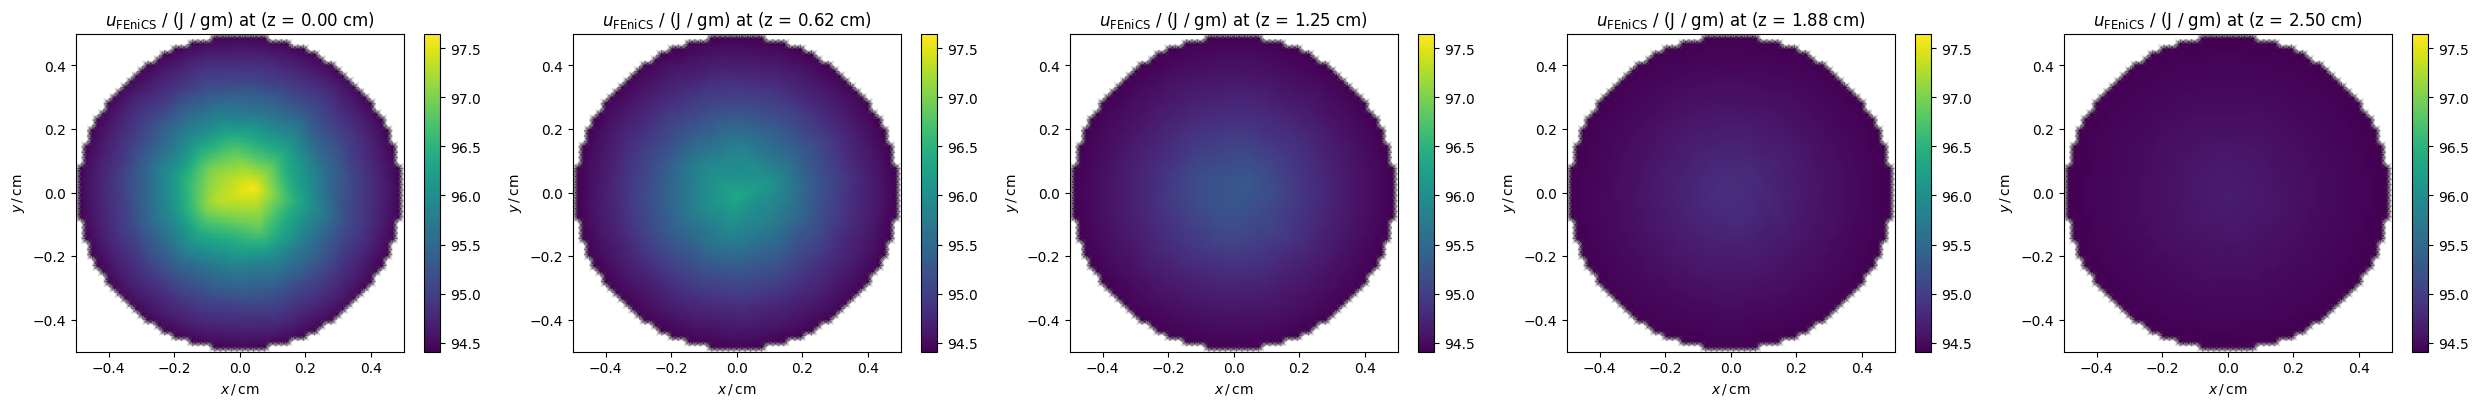

In [15]:
idx = 0
n_rows = 1
n_cols = 5
sz_h = 5
sz_v = sz_h / 1.2
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))
shading = 'gouraud'
# shading = 'nearest'

for zc in np.linspace(0, leng, 5):
    u_fenics = np.asarray([ [ u_in_cyl(rad * (1. - 2.e-2), x, y, zc) for x in xv] for y in yv])

    idx += 1
    ax = plt.subplot(n_rows, n_cols, idx)
    # ax.set_aspect(1.0)
    pcm = ax.pcolormesh(xv, yv, u_fenics, cmap = plt.cm.viridis, shading = shading, vmin = U20, vmax = 97.65)
    plt.colorbar(pcm)
    plt.title(r'$u_\mathrm{FEniCS}$ / (J / gm) at ' + '(z = {0:4.2f} cm)'.format(zc))
    plt.xlabel(r'$x \,/\, \mathrm{cm}$')
    plt.ylabel(r'$y \,/\, \mathrm{cm}$')

plt.tight_layout()
plt.show()

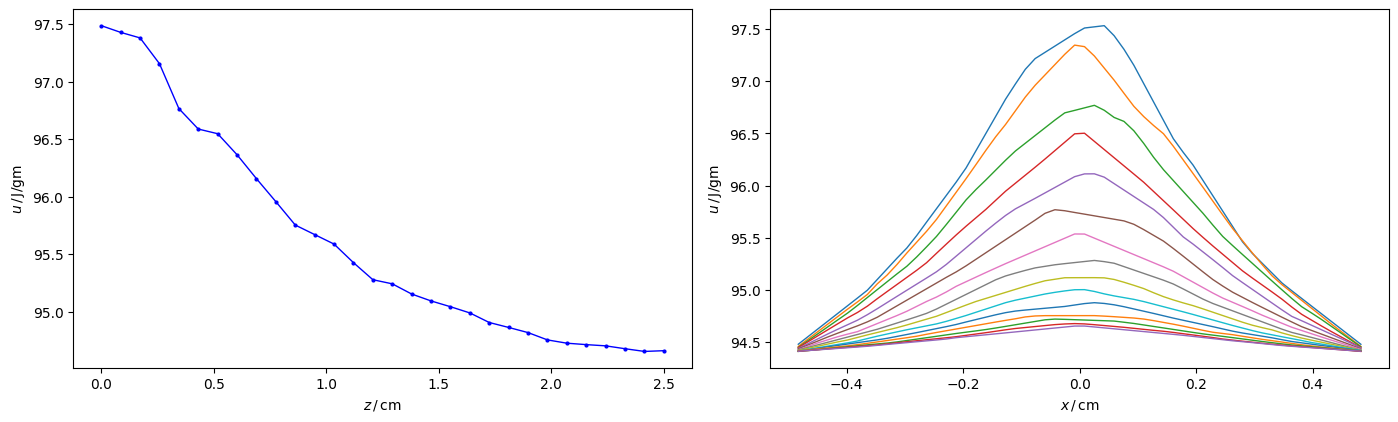

In [16]:
idx = 0
n_rows = 1
n_cols = 5
sz_h = 7
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.set_aspect(0.618)
u_fenics = np.asarray([ u_in_cyl(rad * (1. - 2.e-2), 0., 0., z) for z in zv])
plt.plot(zv, u_fenics, 'b.-', lw = 1, ms = 4)
plt.xlabel(r'$z \,/\, \mathrm{cm}$')
plt.ylabel(r'$u \,/\, \mathrm{J/gm}$')

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.set_aspect(0.418)
for z in np.linspace(z_en, z_so, 15):
    u_fenics = np.asarray([ u_in_cyl(rad * (1. - 2.e-2), x, 0., z) for x in xv])
    plt.plot(xv, u_fenics, '-', lw = 1, ms = 4)
plt.xlabel(r'$x \,/\, \mathrm{cm}$')
plt.ylabel(r'$u \,/\, \mathrm{J/gm}$')

plt.tight_layout()
plt.show()

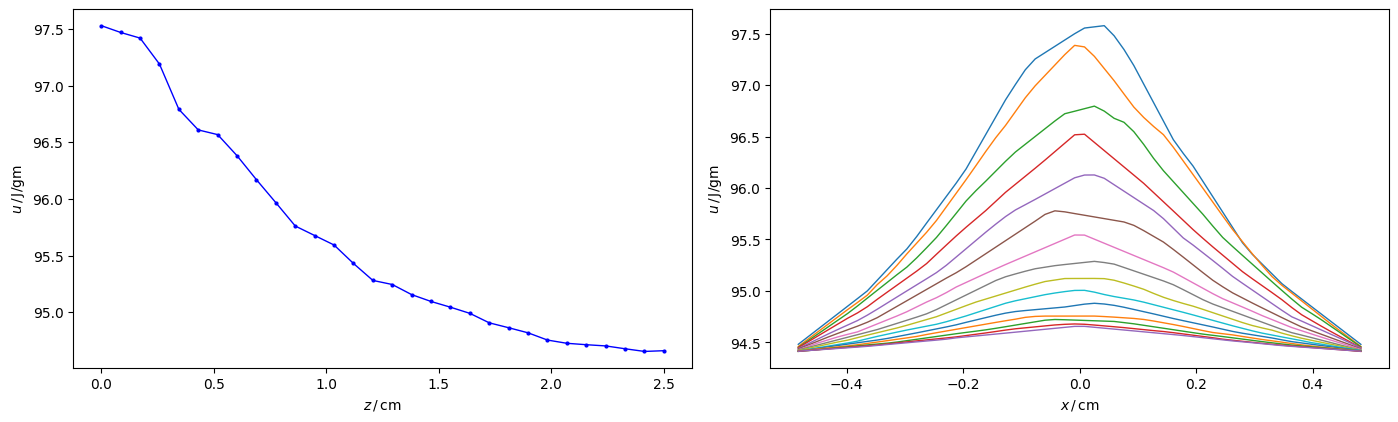

In [30]:
idx = 0
n_rows = 1
n_cols = 5
sz_h = 7
sz_v = sz_h / gr
plt.figure(figsize = (n_cols * sz_h, n_rows * sz_v))

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.set_aspect(0.618)
u_fenics = np.asarray([ u_in_cyl(rad * (1. - 2.e-2), 0., 0., z) for z in zv])
plt.plot(zv, u_fenics, 'b.-', lw = 1, ms = 4)
plt.xlabel(r'$z \,/\, \mathrm{cm}$')
plt.ylabel(r'$u \,/\, \mathrm{J/gm}$')

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
# ax.set_aspect(0.418)
for z in np.linspace(z_en, z_so, 15):
    u_fenics = np.asarray([ u_in_cyl(rad * (1. - 2.e-2), x, 0., z) for x in xv])
    plt.plot(xv, u_fenics, '-', lw = 1, ms = 4)
plt.xlabel(r'$x \,/\, \mathrm{cm}$')
plt.ylabel(r'$u \,/\, \mathrm{J/gm}$')

plt.tight_layout()
plt.show()